# Análisis Exploratorio de Datos (EDA) - Dataset de Autos en Alemania

## Introducción

En este análisis exploratorio de datos (EDA), exploraremos un conjunto de datos que contiene información clave sobre autos en el mercado automotriz alemán. Este dataset se compone de 500 registros que reflejan características comunes de los vehículos disponibles en Alemania, proporcionando una base valiosa para analizar patrones en precios, eficiencia de combustible y otros aspectos importantes del mercado automotriz. El objetivo de este EDA es obtener una visión general de la estructura del dataset, investigar las relaciones entre las variables y preparar los datos para un posible análisis o modelado predictivo del precio de los autos.

### Objetivos Específicos

1. **Entender la estructura y características de los datos**: 
   - Revisaremos la composición general del dataset, incluyendo el tipo y formato de cada variable.
   - Verificaremos si existen valores faltantes o atípicos que puedan requerir procesamiento adicional.

2. **Análisis univariado**:
   - Exploraremos cada variable individualmente para entender la distribución de los datos y las características de cada una. Esto incluye tanto las variables numéricas como las categóricas.

3. **Análisis bivariado**:
   - Investigaremos las relaciones entre el precio de venta (`Price`) y las demás variables para identificar patrones y posibles factores que influyan en el precio.

4. **Matriz de correlación**:
   - Visualizaremos la correlación entre las variables numéricas, lo cual ayudará a identificar relaciones lineales entre las características.

Este EDA nos proporcionará una base sólida para futuras tareas de preprocesamiento de datos, ingeniería de características y modelado predictivo, facilitando la comprensión del mercado de autos en Alemania y los factores que impactan su precio.

**Columnas del Dataset**:

- `Brand`: Marca del auto, incluyendo fabricantes alemanes populares como BMW, Mercedes, Audi, Volkswagen, Porsche y Opel.
- `Model`: Modelo específico dentro de cada marca, como el BMW Serie 3, Mercedes C-Class y Audi A3.
- `Year`: Año de fabricación del vehículo, que varía desde 2005 hasta 2023.
- `Mileage`: Kilómetros totales que ha recorrido cada auto, con valores que oscilan entre 5,000 y 300,000 km.
- `Fuel Type`: Tipo de combustible que utiliza el auto, incluyendo opciones como Gasolina, Diésel, Eléctrico e Híbrido.
- `Fuel Consumption (L/100km)`: Consumo promedio de combustible del vehículo, en litros por 100 kilómetros, con un rango de 3.0 a 12.0 L/100km.
- `Horsepower (HP)`: Potencia del motor en caballos de fuerza, con valores que van de 70 a 500 HP.
- `Transmission`: Tipo de transmisión del auto (manual o automática).
- `Price (€)`: Precio del vehículo en euros, con un rango de €5,000 a €100,000.
- `City`: Ciudad en Alemania donde está disponible cada vehículo, incluyendo ciudades como Berlín, Múnich, Hamburgo, Colonia y Frankfurt.

A continuación, comenzaremos con el análisis de cada una de estas características.

In [2]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el dataset
df = pd.read_csv("germany_auto_industry_dataset.csv")  # Asegúrate de reemplazar "used_cars.csv" con la ruta de tu archivo

In [4]:
# Eliminar espacios en blanco alrededor de los nombres de las columnas
df.columns = df.columns.str.strip()

# Eliminar espacios en blanco alrededor de los valores de las filas para todas las columnas de tipo objeto
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Mostrar el DataFrame modificado
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg


In [5]:
# Renombrar las columnas
df.rename(columns={
    'Brand': 'Marca',
    'Model': 'Modelo',
    'Year': 'Año',
    'Mileage': 'Kilometraje',
    'Fuel Type': 'Tipo_Combustible',
    'Fuel Consumption (L/100km)': 'Consumo_Combustible_L_100km',
    'Horsepower (HP)': 'Potencia_HP',
    'Transmission': 'Transmision',
    'Price': 'Precio_Venta',
    'City': 'Ciudad'
}, inplace=True)

# Verificar el cambio
df.head()

,Marca,Modelo,Año,Kilometraje,Tipo_Combustible,Consumo_Combustible_L_100km,Potencia_HP,Transmision,Precio_Venta,Ciudad
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg


In [6]:
# Verificar tipos de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Marca                        500 non-null    object 
 1   Modelo                       500 non-null    object 
 2   Año                          500 non-null    int64  
 3   Kilometraje                  500 non-null    int64  
 4   Tipo_Combustible             500 non-null    object 
 5   Consumo_Combustible_L_100km  500 non-null    float64
 6   Potencia_HP                  500 non-null    int64  
 7   Transmision                  500 non-null    object 
 8   Precio_Venta                 500 non-null    float64
 9   Ciudad                       500 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 39.2+ KB


In [7]:
# Obtener los valores únicos en la columna Modelo
valores_unicos = df['Marca'].unique()

# Mostrar los valores únicos y la cantidad total de valores únicos
print("Valores únicos en la columna Marca:")
print(valores_unicos)
print(f"\nTotal de valores únicos: {len(valores_unicos)}")

Valores únicos en la columna Marca:
['Audi' 'Opel' 'Mercedes' 'Volkswagen' 'BMW' 'Porsche']

Total de valores únicos: 6


C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\4096188065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=marca_counts.index, y=marca_counts.values, palette='viridis')


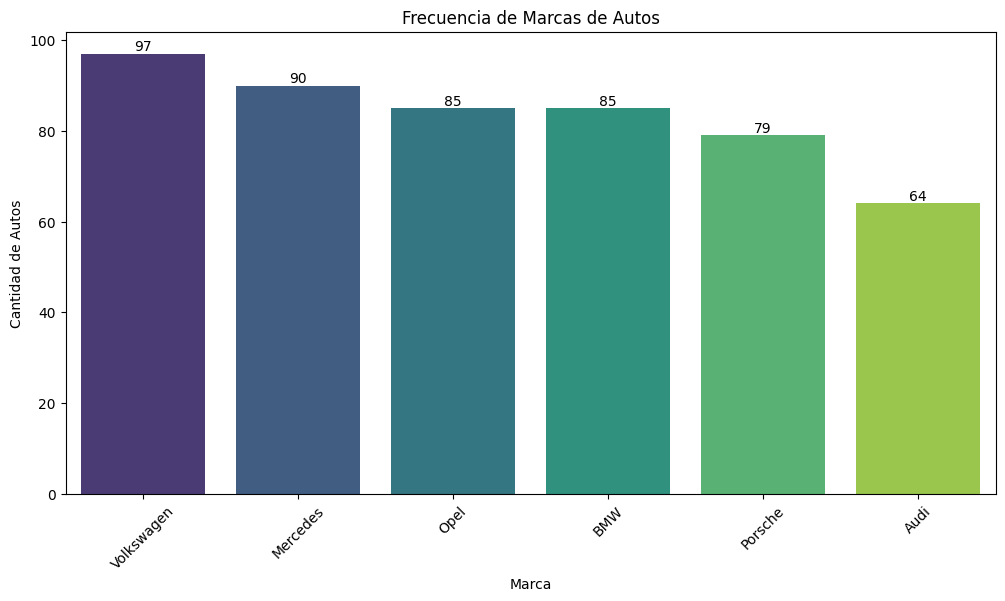

In [8]:
# Contar la cantidad de autos por marca
marca_counts = df['Marca'].value_counts()

# Crear el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=marca_counts.index, y=marca_counts.values, palette='viridis')

# Agregar etiquetas de cantidad en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title('Frecuencia de Marcas de Autos')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Autos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [9]:
# Obtener los valores únicos en la columna Modelo
valores_unicos = df['Modelo'].unique()

# Mostrar los valores únicos y la cantidad total de valores únicos
print("Valores únicos en la columna Modelo:")
print(valores_unicos)
print(f"\nTotal de valores únicos: {len(valores_unicos)}")

Valores únicos en la columna Modelo:
['Q7' 'Corsa' 'C-Class' 'Polo' 'Astra' 'Tiguan' 'X3' '5 Series' 'Panamera'
 '3 Series' 'E-Class' 'Passat' 'Golf' 'A3' 'Q5' 'Insignia' 'GLA' 'GLE'
 'A4' 'X5' 'Macan' 'Cayenne']

Total de valores únicos: 22


C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\1647830591.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos.index, y=modelos.values, ax=axes[i], palette='viridis')
C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\1647830591.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos.index, y=modelos.values, ax=axes[i], palette='viridis')
C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\1647830591.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos.index, y=modelos.values, ax=axes[i], palette='vi

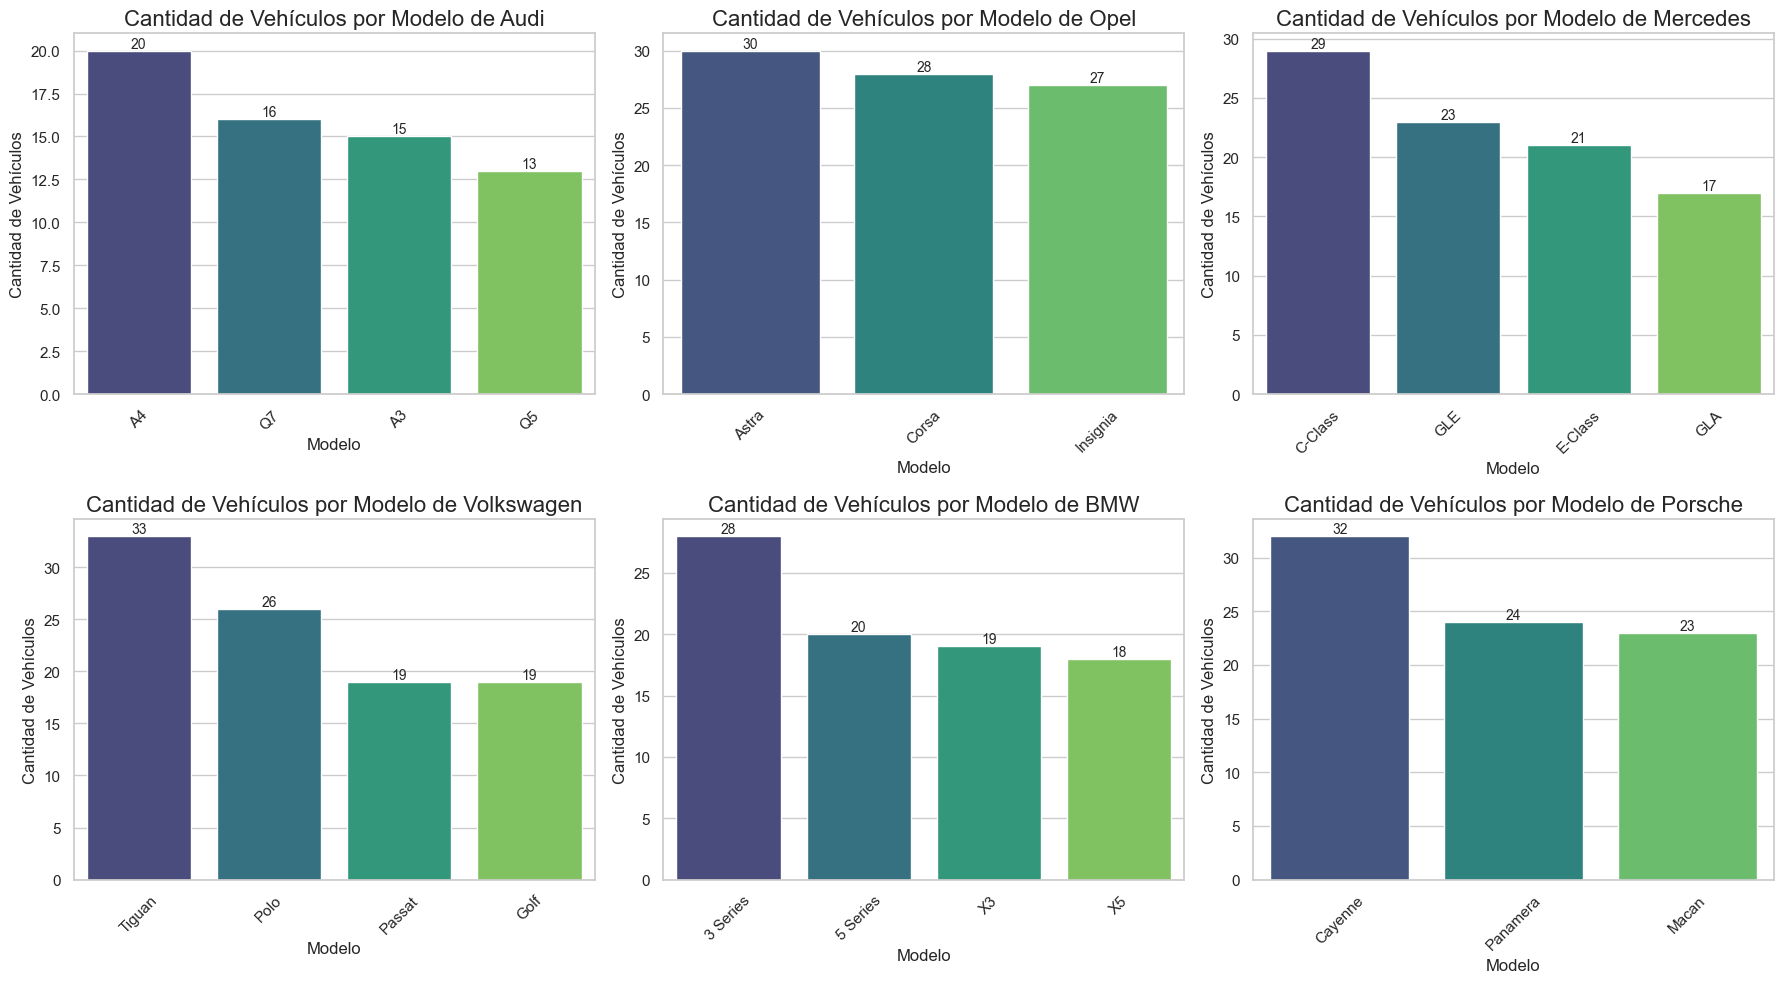

In [10]:
marcas = df['Marca'].unique()  # Obtener las marcas únicas

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura con 6 subgráficas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 filas y 3 columnas
axes = axes.flatten()  # Aplanar la matriz de ejes para un fácil acceso

# Iterar a través de cada marca y crear un gráfico para cada una
for i, marca in enumerate(marcas):
    # Filtrar el DataFrame por la marca actual
    modelos = df[df['Marca'] == marca]['Modelo'].value_counts()
    
    # Crear el gráfico
    sns.barplot(x=modelos.index, y=modelos.values, ax=axes[i], palette='viridis')
    
    # Agregar etiquetas de cantidad en cada barra
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10)
    
    axes[i].set_title(f'Cantidad de Vehículos por Modelo de {marca}', fontsize=16)
    axes[i].set_ylabel('Cantidad de Vehículos', fontsize=12)
    axes[i].set_xlabel('Modelo', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x

# Ajustar el layout para que no se superpongan
plt.tight_layout()
plt.show()

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\656027932.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precios_promedio.index, y=precios_promedio.values, ax=axes[i], palette='viridis')
C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\656027932.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precios_promedio.index, y=precios_promedio.values, ax=axes[i], palette='viridis')
C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\656027932.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precios_promedio.index,

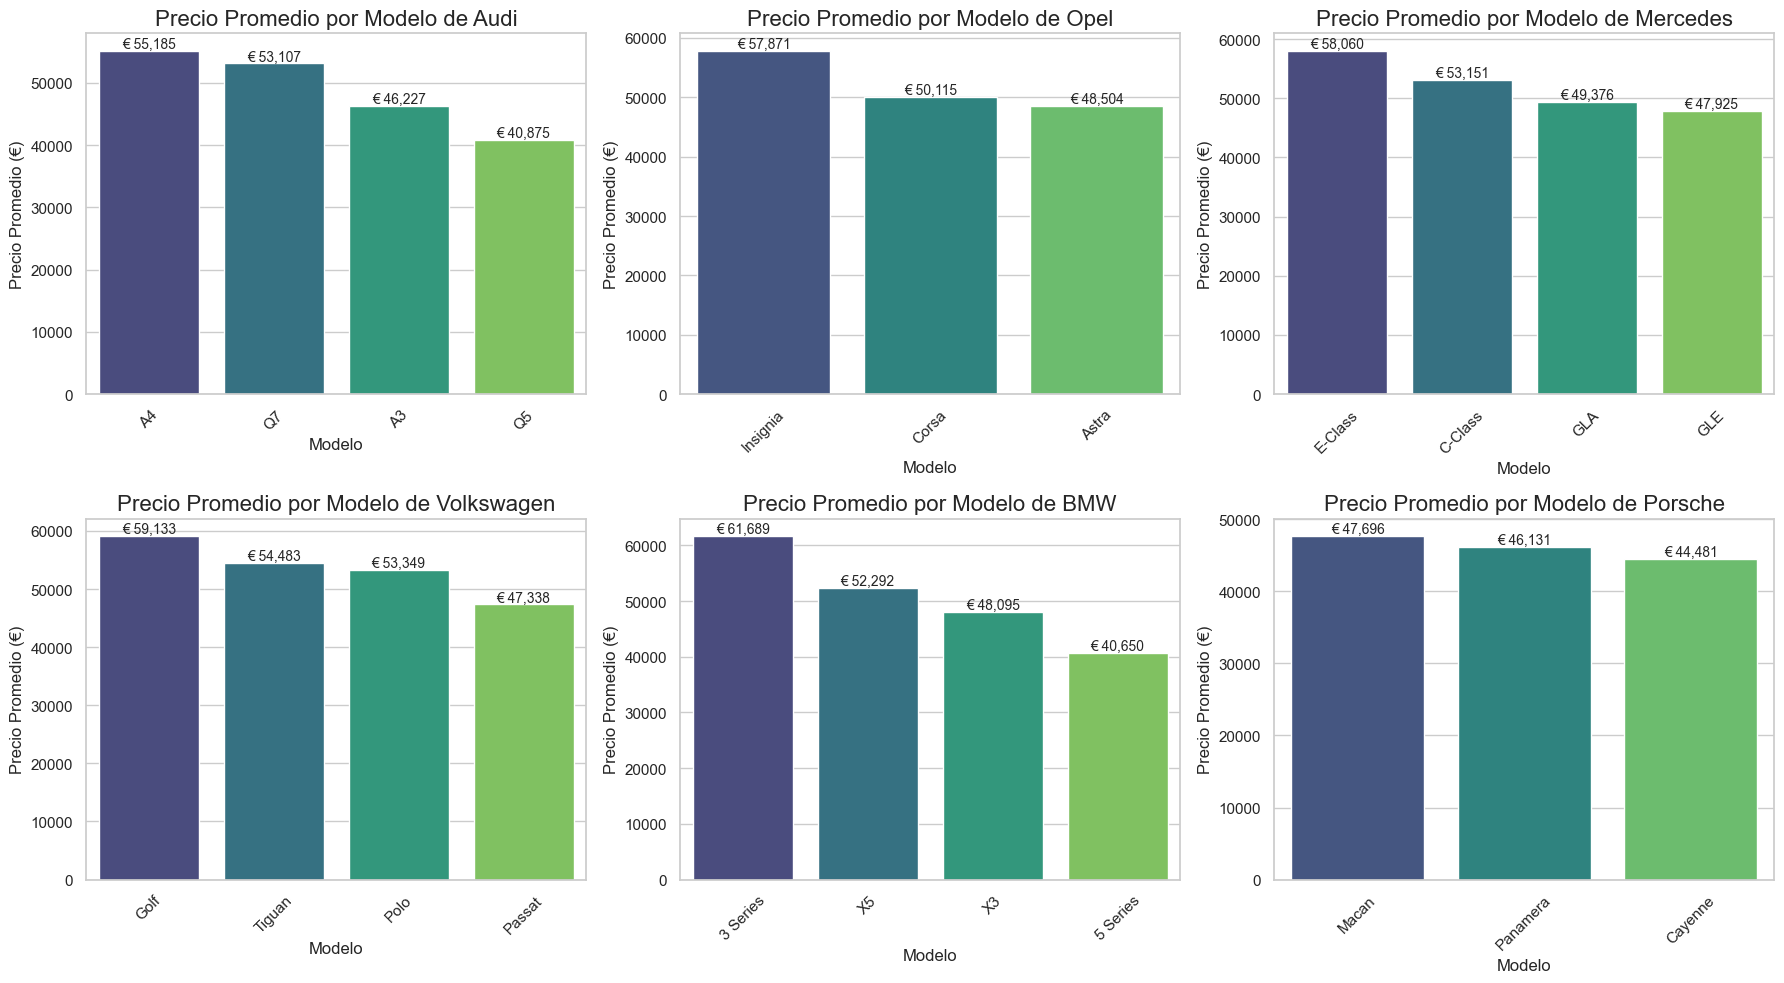

In [11]:
marcas = df['Marca'].unique()  # Obtener las marcas únicas

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura con 6 subgráficas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 filas y 3 columnas
axes = axes.flatten()  # Aplanar la matriz de ejes para un fácil acceso

# Iterar a través de cada marca y crear un gráfico para cada una
for i, marca in enumerate(marcas):
    # Filtrar el DataFrame por la marca actual y calcular el precio promedio por modelo
    precios_promedio = df[df['Marca'] == marca].groupby('Modelo')['Precio_Venta'].mean().sort_values(ascending=False)
    
    # Crear el gráfico
    sns.barplot(x=precios_promedio.index, y=precios_promedio.values, ax=axes[i], palette='viridis')
    
    # Agregar etiquetas de precio en cada barra con separador de miles
    for p in axes[i].patches:
        axes[i].annotate(f'€ {p.get_height():,.0f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10)
    
    axes[i].set_title(f'Precio Promedio por Modelo de {marca}', fontsize=16)
    axes[i].set_ylabel('Precio Promedio (€)', fontsize=12)
    axes[i].set_xlabel('Modelo', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x

# Ajustar el layout para que no se superpongan
plt.tight_layout()
plt.show()

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\3810516773.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_anios.index, y=conteo_anios.values, palette="viridis")


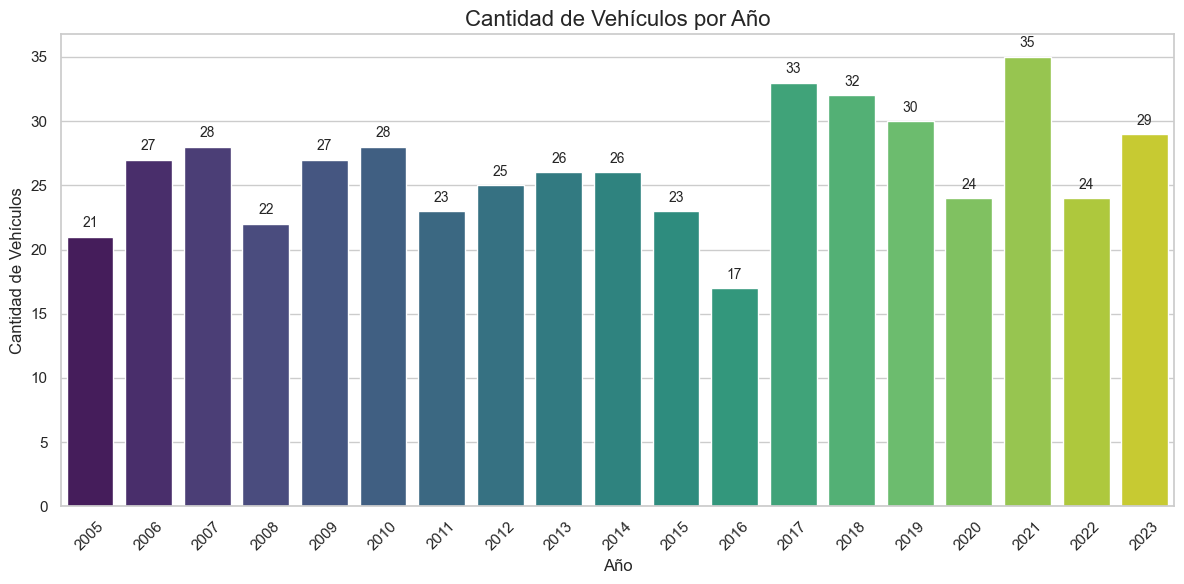

In [12]:
# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Contar la cantidad de vehículos por año y ordenar los años
conteo_anios = df['Año'].value_counts().sort_index()

# Crear la figura y el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values, palette="viridis")

# Añadir etiquetas de cantidad en cada barra
for index, value in enumerate(conteo_anios.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Configuración de la gráfica
plt.title('Cantidad de Vehículos por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Vehículos', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()


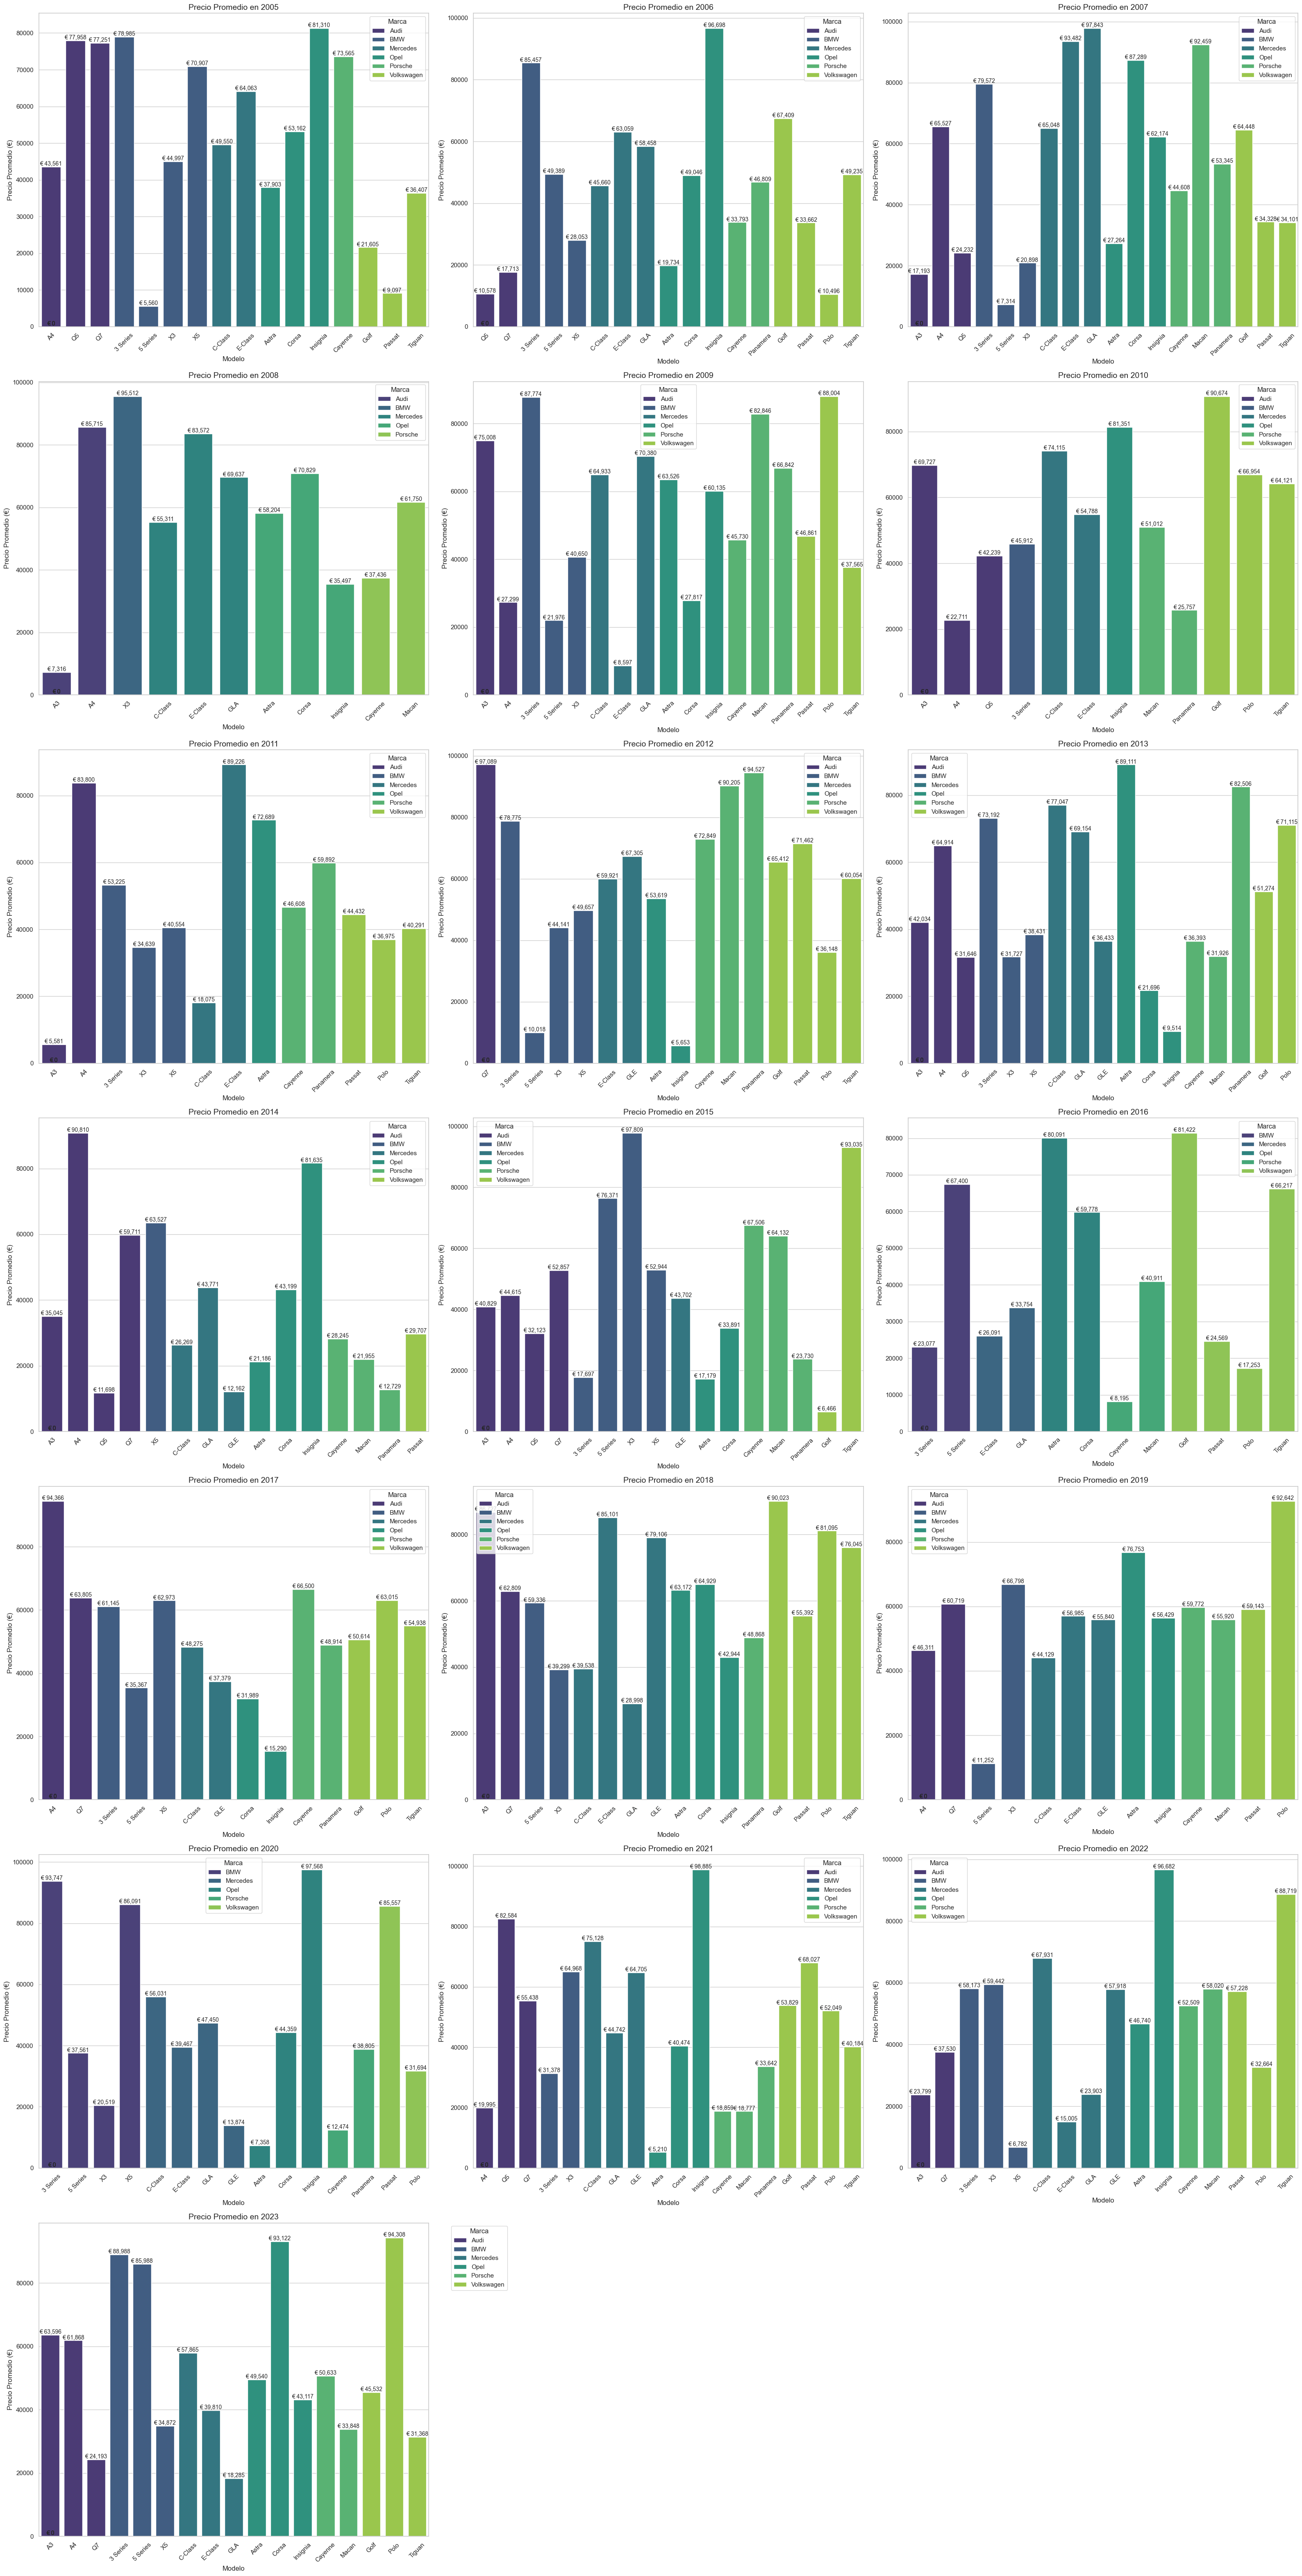

In [13]:
# Filtrar los años que tenemos en el conjunto de datos
anios = df['Año'].unique()  # Obtener los años únicos
anios.sort()  # Asegurarse de que estén ordenados

# Determinar el número de años y ajustar la figura
num_anios = len(anios)
num_columnas = 3
num_filas = (num_anios + num_columnas - 1) // num_columnas  # Calcular filas necesarias

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura con subgráficas
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(32, 9 * num_filas))  # Ajustar tamaño según filas
axes = axes.flatten()  # Aplanar la matriz de ejes para un fácil acceso

# Iterar a través de cada año y crear un gráfico para cada uno
for i, anio in enumerate(anios):
    # Filtrar el DataFrame por el año actual y calcular el precio promedio por Marca y Modelo
    precios_promedio = df[df['Año'] == anio].groupby(['Marca', 'Modelo'])['Precio_Venta'].mean().reset_index()
    
    # Crear el gráfico
    sns.barplot(data=precios_promedio, x='Modelo', y='Precio_Venta', hue='Marca', ax=axes[i], palette='viridis')
    
    # Agregar etiquetas de precio en cada barra
    for p in axes[i].patches:
        axes[i].annotate(f'€ {p.get_height():,.0f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10)
    
    axes[i].set_title(f'Precio Promedio en {anio}', fontsize=14)
    axes[i].set_ylabel('Precio Promedio (€)', fontsize=12)
    axes[i].set_xlabel('Modelo', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x

# Ocultar ejes adicionales si hay menos años que subgráficas
for j in range(num_anios, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para que no se superpongan
plt.tight_layout()
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [14]:
# Agrupar por Marca, Modelo y Año, contando la cantidad de vehículos
ventas_por_modelo = df.groupby(['Marca', 'Modelo', 'Año']).size().reset_index(name='Cantidad_Vendida')

# Encontrar el carro más vendido por Marca, Modelo y Año
carros_mas_vendidos = ventas_por_modelo.loc[ventas_por_modelo.groupby(['Marca', 'Año'])['Cantidad_Vendida'].idxmax()]

# Mostrar el resultado
carros_mas_vendidos


,Marca,Modelo,Año,Cantidad_Vendida
24,Audi,Q5,2005,2
33,Audi,Q7,2006,2
12,Audi,A4,2007,2
1,Audi,A3,2008,1
2,Audi,A3,2009,1
...,...,...,...,...
257,Volkswagen,Passat,2019,3
271,Volkswagen,Polo,2020,3
246,Volkswagen,Golf,2021,4
273,Volkswagen,Polo,2022,2


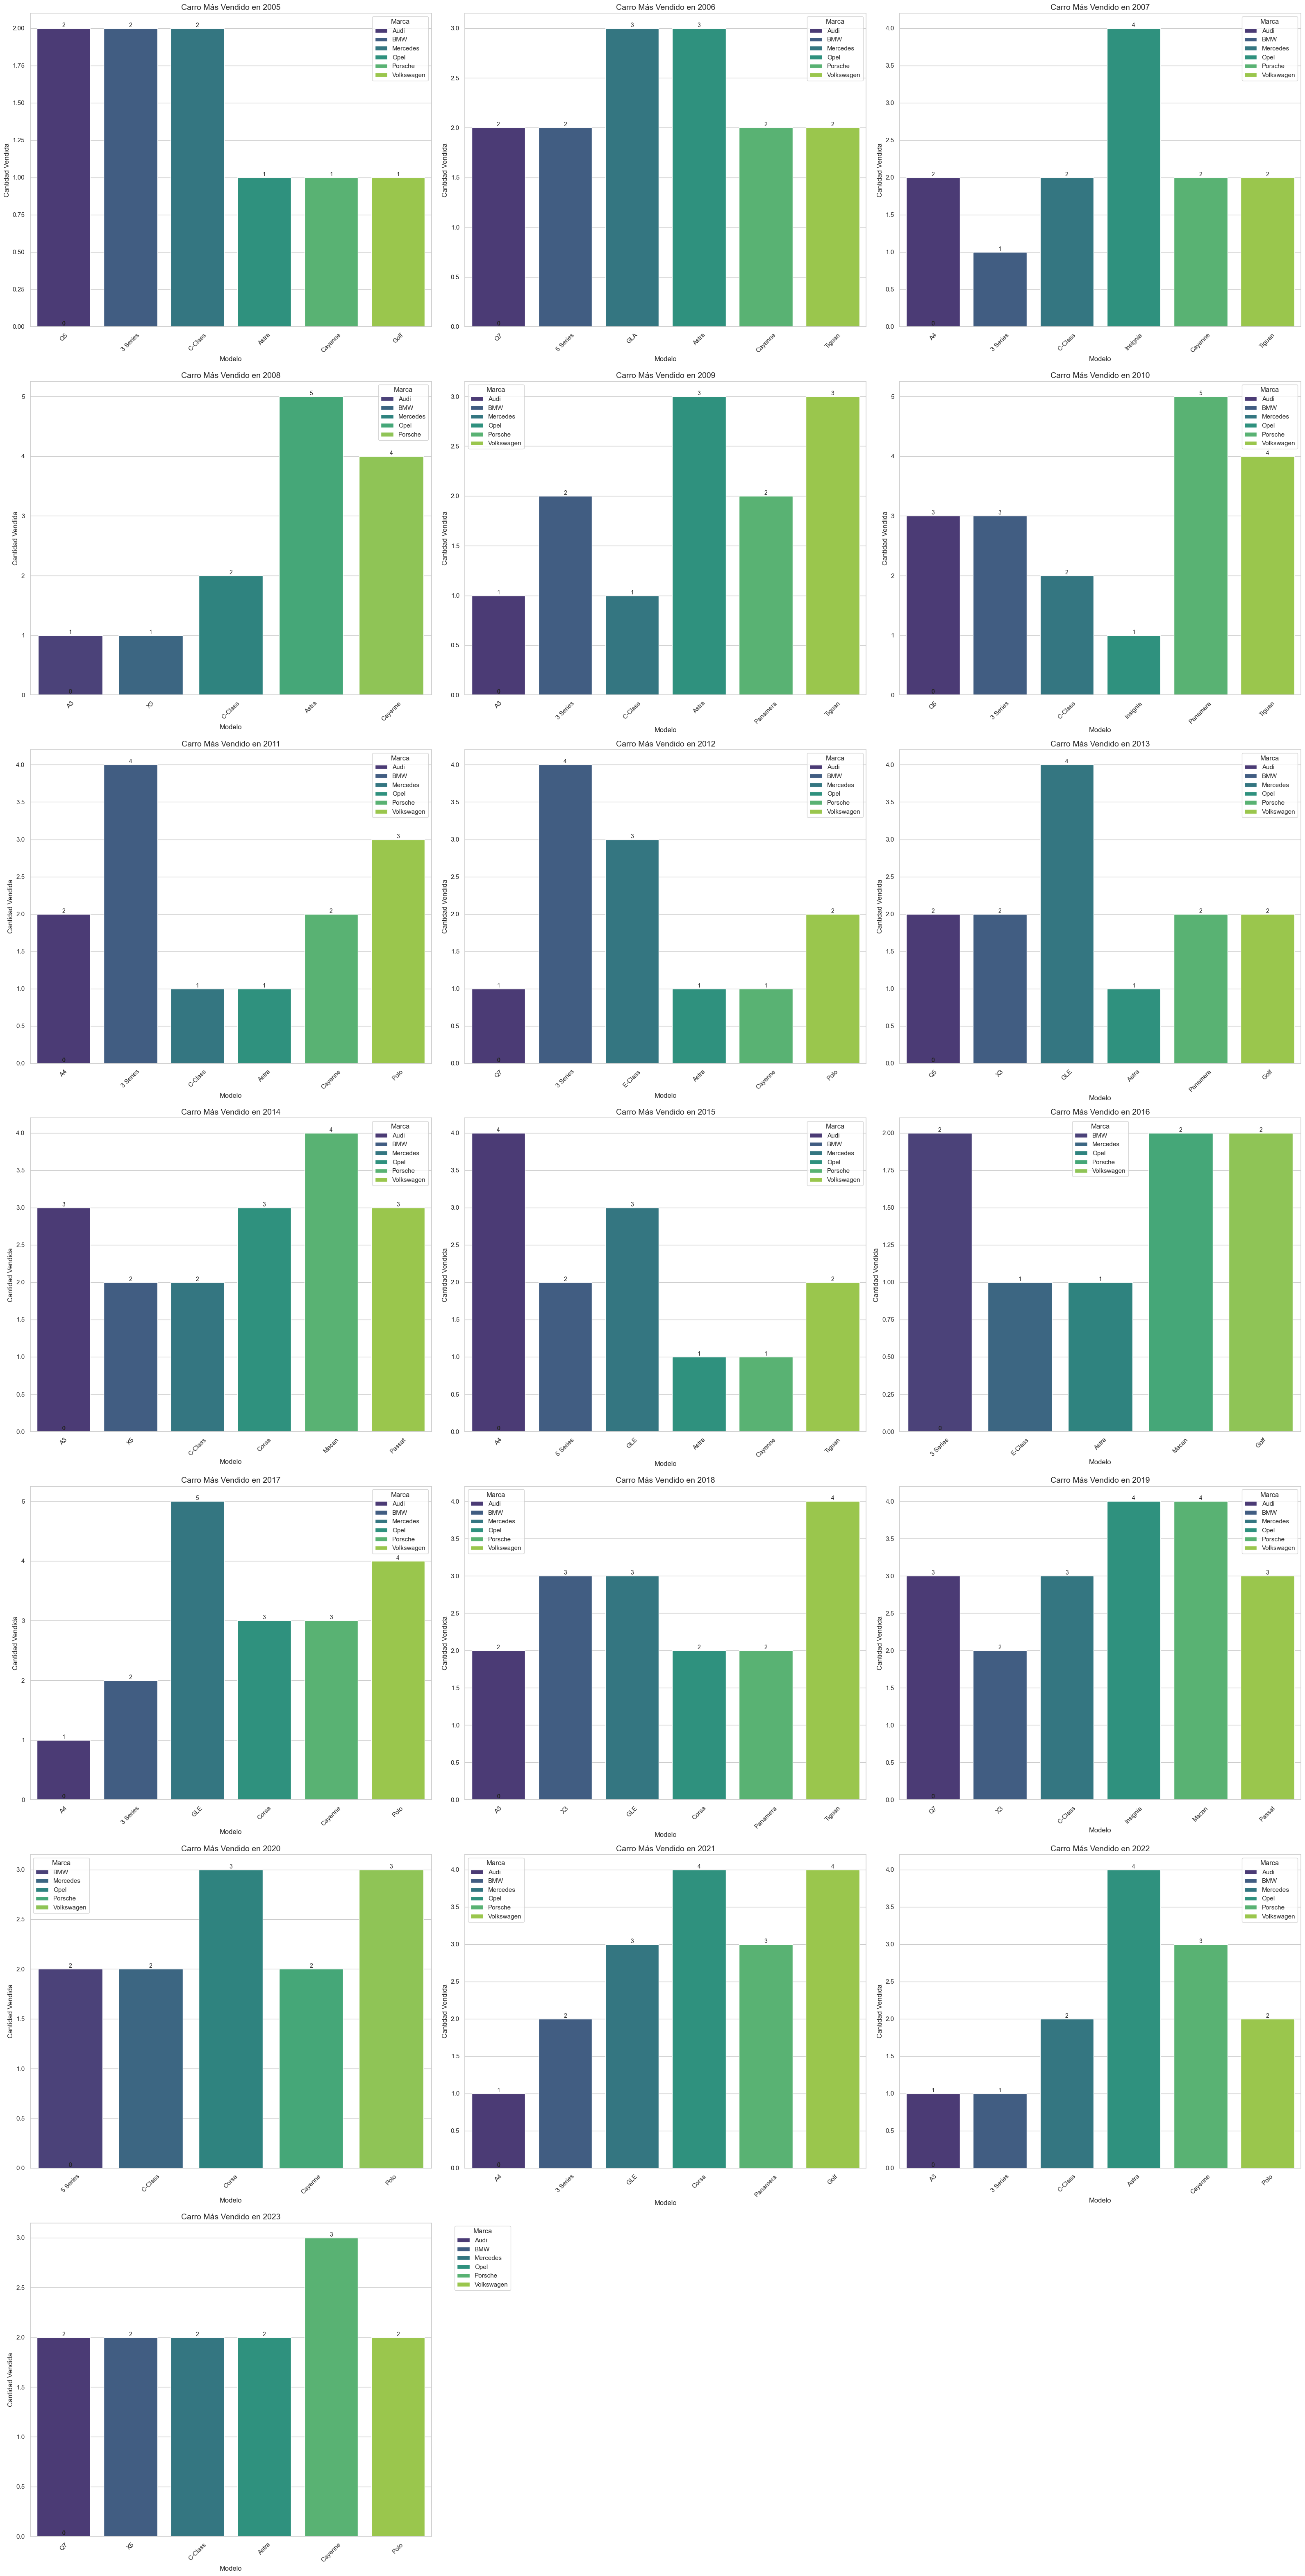

In [15]:
# Filtrar los años que tenemos en el conjunto de datos
anios = carros_mas_vendidos['Año'].unique()  # Obtener los años únicos
anios.sort()  # Asegurarse de que estén ordenados

# Determinar el número de años y ajustar la figura
num_anios = len(anios)
num_columnas = 3
num_filas = (num_anios + num_columnas - 1) // num_columnas  # Calcular filas necesarias

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura con subgráficas
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(32, 9 * num_filas))  # Ajustar tamaño según filas
axes = axes.flatten()  # Aplanar la matriz de ejes para un fácil acceso

# Iterar a través de cada año y crear un gráfico para cada uno
for i, anio in enumerate(anios):
    # Filtrar el DataFrame por el año actual
    carros_vendidos = carros_mas_vendidos[carros_mas_vendidos['Año'] == anio]
    
    # Crear el gráfico
    sns.barplot(data=carros_vendidos, x='Modelo', y='Cantidad_Vendida', hue='Marca', ax=axes[i], palette='viridis')
    
    # Agregar etiquetas de cantidad en cada barra
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height()):,}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10)
    
    axes[i].set_title(f'Carro Más Vendido en {anio}', fontsize=14)
    axes[i].set_ylabel('Cantidad Vendida', fontsize=12)
    axes[i].set_xlabel('Modelo', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x

# Ocultar ejes adicionales si hay menos años que subgráficas
for j in range(num_anios, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para que no se superpongan
plt.tight_layout()
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
# Agrupar por Año y Marca, contando la cantidad de vehículos vendidos
ventas_por_anio_marca = df.groupby(['Año', 'Marca']).size().reset_index(name='Cantidad_Vendida')

# Encontrar la marca más vendida por Año
marcas_mas_vendidas = ventas_por_anio_marca.loc[ventas_por_anio_marca.groupby('Año')['Cantidad_Vendida'].idxmax()]

# Seleccionar solo las columnas 'Año' y 'Marca'
resultado_final = marcas_mas_vendidas[['Año', 'Marca', 'Cantidad_Vendida']]

# Mostrar el resultado
resultado_final.reset_index(drop=True, inplace=True)
resultado_final

,Año,Marca,Cantidad_Vendida
0,2005,BMW,6
1,2006,Opel,7
2,2007,Opel,7
3,2008,Opel,9
4,2009,Opel,7
5,2010,Audi,7
6,2011,BMW,7
7,2012,BMW,10
8,2013,Mercedes,6
9,2014,Audi,6


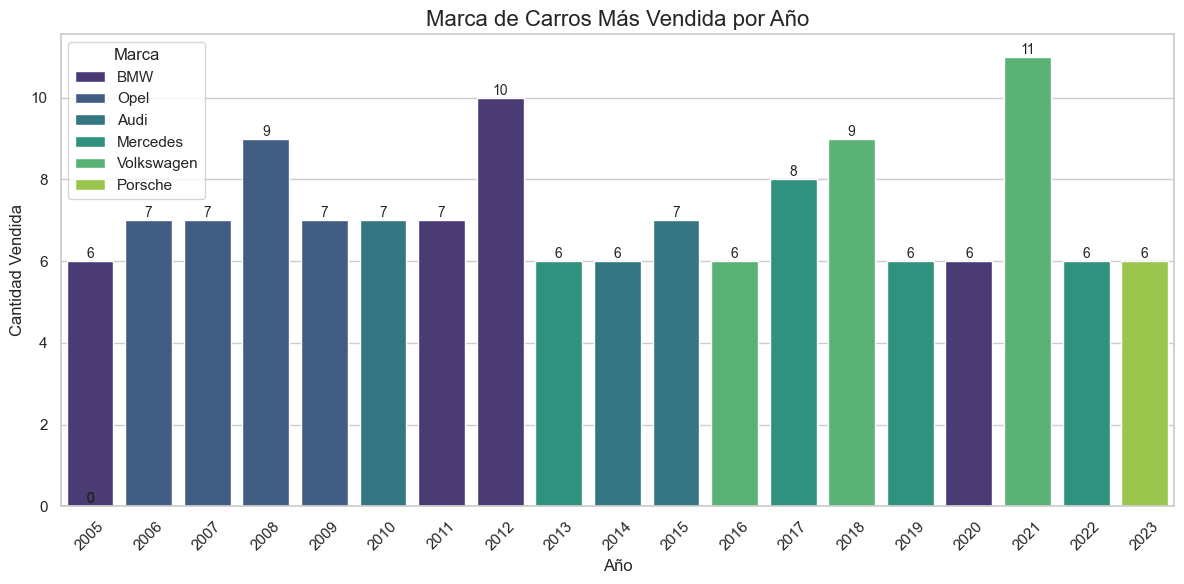

In [17]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=resultado_final, x='Año', y='Cantidad_Vendida', hue='Marca', palette='viridis')

# Agregar etiquetas y título
plt.title('Marca de Carros Más Vendida por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)

# Agregar etiquetas de cantidad en cada barra
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10)

# Ajustar el layout
plt.xticks(rotation=45)
plt.legend(title='Marca')
plt.tight_layout()
plt.show()


## Análisis de la Distribución de Precios de Venta

In [18]:
# Encontrar el carro más caro
carro_mas_caro = df.loc[df['Precio_Venta'].idxmax(), ['Marca', 'Modelo', 'Año', 'Precio_Venta']]

# Encontrar el carro más barato
carro_mas_barato = df.loc[df['Precio_Venta'].idxmin(), ['Marca', 'Modelo', 'Año', 'Precio_Venta']]

# Mostrar los resultados
print("Carro más caro:")
print(carro_mas_caro)

print("\nCarro más barato:")
print(carro_mas_barato)

Carro más caro:
Marca            Porsche
Modelo           Cayenne
Año                 2022
Precio_Venta    99981.48
Name: 400, dtype: object

Carro más barato:
Marca              Opel
Modelo            Astra
Año                2021
Precio_Venta    5209.73
Name: 260, dtype: object


In [19]:
# Calcular estadísticas descriptivas de los precios
tabla_resumen_precios = df['Precio_Venta'].describe()

# Mostrar la tabla
tabla_resumen_precios

count      500.000000
mean     51064.288940
std      28652.646997
min       5209.730000
25%      24478.057500
50%      52892.525000
75%      75037.670000
max      99981.480000
Name: Precio_Venta, dtype: float64

El análisis de los precios de venta de los vehículos en nuestro conjunto de datos revela información valiosa sobre el mercado. A continuación, se presentan las principales estadísticas descriptivas:

1. **Número de Observaciones**: Se han registrado un total de **500 vehículos** en el conjunto de datos, lo que proporciona una base sólida para el análisis.

2. **Precio Promedio**: El **precio promedio de venta** es de aproximadamente **€51,064**. Este valor nos da una idea general de cuánto están dispuestos a pagar los consumidores por un vehículo.

3. **Desviación Estándar**: La **desviación estándar** es de alrededor de **€28,653**, lo que indica una considerable variabilidad en los precios de venta. Esto sugiere que, aunque hay vehículos en un rango de precios promedio, también existen muchos que se alejan significativamente de este valor.

4. **Rango de Precios**:
   - El **precio mínimo** registrado es de **€5,210**, lo que podría corresponder a vehículos más antiguos o con características básicas.
   - En contraste, el **precio máximo** es de **€99,981**, que sugiere la presencia de vehículos de lujo o de alto rendimiento en el mercado.

5. **Cuartiles**:
   - El **primer cuartil (Q1)**, que se encuentra en **€24,478**, indica que el 25% de los vehículos se venden a este precio o menos.
   - La **mediana (Q2)** es de **€52,893**, lo que significa que la mitad de los vehículos se venden por menos de esta cantidad, reflejando que el precio de venta está bastante distribuido en torno a este valor.
   - El **tercer cuartil (Q3)** es de **€75,038**, lo que indica que el 75% de los vehículos se venden a este precio o menos, lo que demuestra que hay una proporción significativa de vehículos que alcanzan precios elevados.

### Conclusión

La distribución de los precios de venta sugiere un mercado diverso, con opciones tanto accesibles como premium. La amplia variabilidad en los precios, junto con la presencia de vehículos en extremos opuestos del rango de precios, indica que los consumidores tienen múltiples opciones según sus necesidades y presupuestos. Este análisis puede ayudar a los vendedores a posicionar sus vehículos de manera más efectiva y a los compradores a entender mejor el valor de los vehículos en el mercado actual.

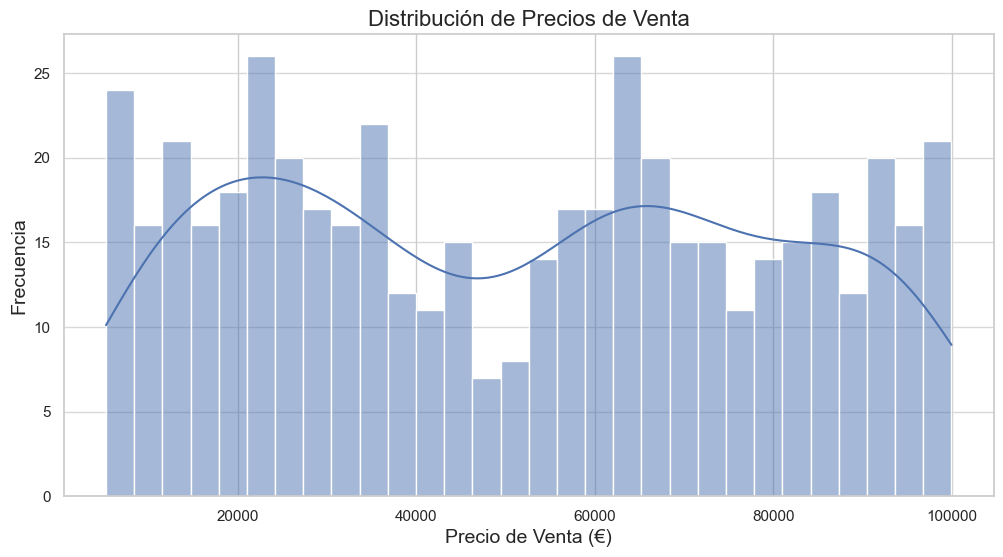

In [20]:
# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(df['Precio_Venta'], bins=30, kde=True)  # kde=True agrega la curva de densidad
plt.title('Distribución de Precios de Venta', fontsize=16)
plt.xlabel('Precio de Venta (€)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\1428742408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marca', y='Precio_Venta', palette='viridis')


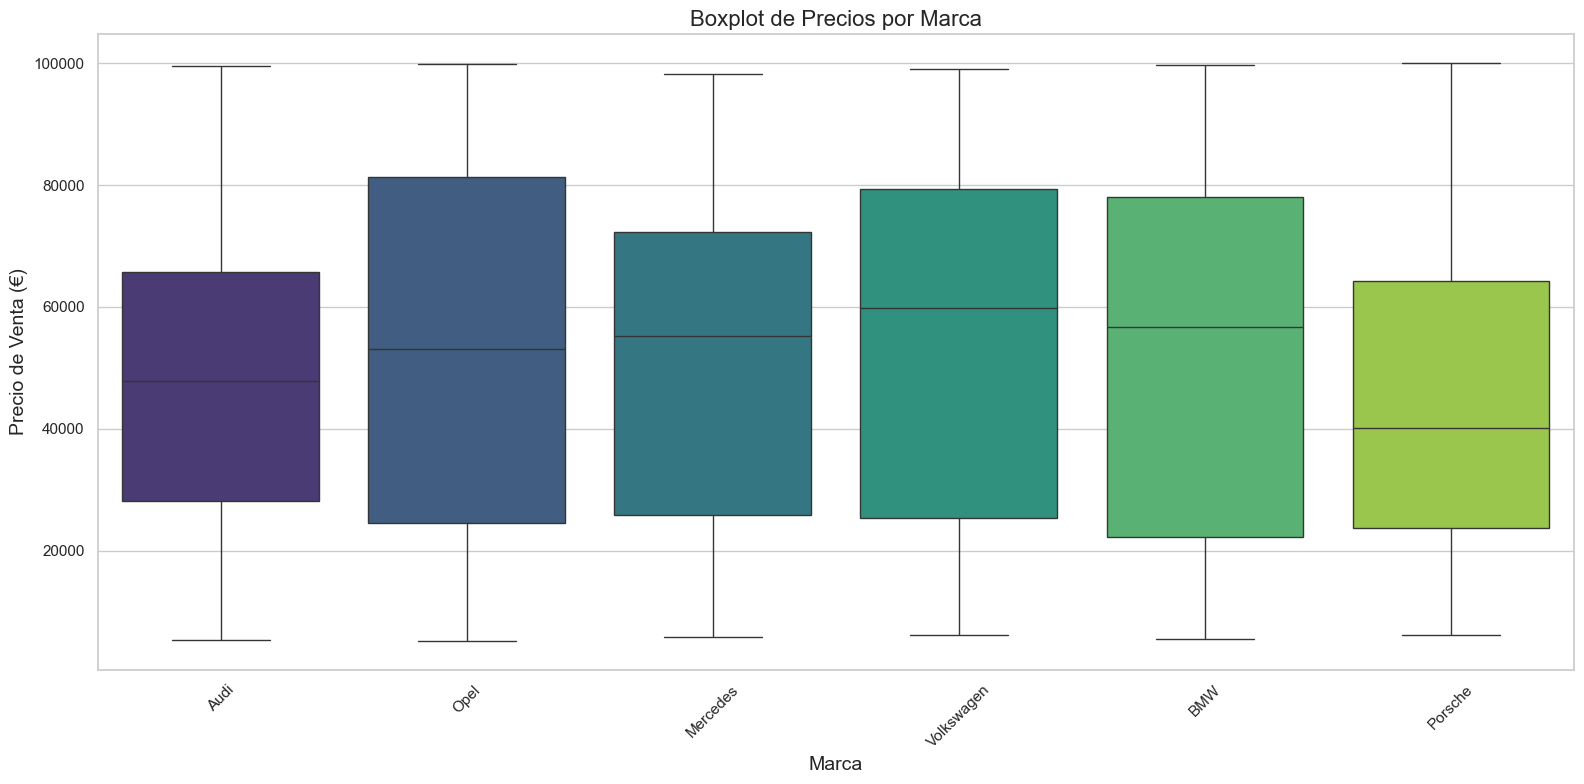

In [21]:
# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(16, 8))  # Ajustar el tamaño de la figura
sns.boxplot(data=df, x='Marca', y='Precio_Venta', palette='viridis')

# Agregar título y etiquetas
plt.title('Boxplot de Precios por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Precio de Venta (€)', fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Análisis de Kilometraje y Precio de Venta

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Estadísticas Descriptivas del Kilometraje:
count       500.000000
mean     158885.270000
std       85604.122684
min        5667.000000
25%       85787.250000
50%      160433.500000
75%      234079.750000
max      299573.000000
Name: Kilometraje, dtype: float64

Estadísticas Descriptivas del Precio de Venta:
count      500.000000
mean     51064.288940
std      28652.646997
min       5209.730000
25%      24478.057500
50%      52892.525000
75%      75037.670000
max      99981.480000
Name: Precio_Venta, dtype: float64

Correlación entre Precio y Kilometraje: -0.03


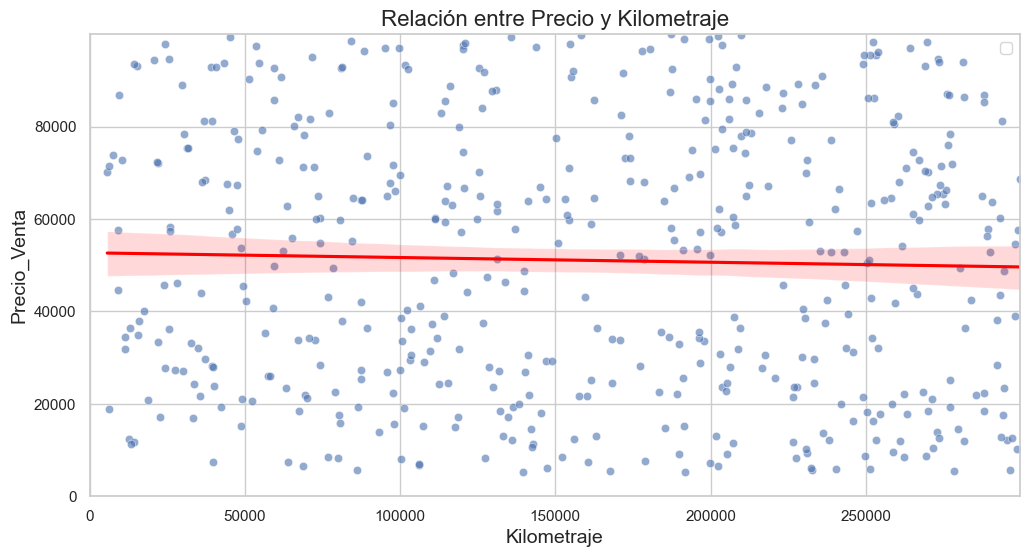

In [22]:
# Calcular estadísticas descriptivas para Precio y Kilometraje
estadisticas_kilometraje = df['Kilometraje'].describe()
estadisticas_precio = df['Precio_Venta'].describe()

# Imprimir las estadísticas
print("Estadísticas Descriptivas del Kilometraje:")
print(estadisticas_kilometraje)
print("\nEstadísticas Descriptivas del Precio de Venta:")
print(estadisticas_precio)

# Calcular la correlación entre Precio y Kilometraje
correlacion = df['Precio_Venta'].corr(df['Kilometraje'])
print(f"\nCorrelación entre Precio y Kilometraje: {correlacion:.2f}")

# Crear un gráfico de dispersión para visualizar la relación
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Kilometraje', y='Precio_Venta', alpha=0.6)
plt.title('Relación entre Precio y Kilometraje', fontsize=16)
plt.xlabel('Kilometraje (km)', fontsize=14)
plt.ylabel('Precio de Venta (€)', fontsize=14)
plt.xlim(0, df['Kilometraje'].max())  # Limitar el eje x para mejor visualización
plt.ylim(0, df['Precio_Venta'].max())  # Limitar el eje y para mejor visualización

# Añadir una línea de tendencia
sns.regplot(data=df, x='Kilometraje', y='Precio_Venta', scatter=False, color='red', line_kws={"label": "Línea de Tendencia"})
plt.legend()

plt.show()

El análisis de las estadísticas descriptivas del kilometraje y del precio de venta nos proporciona una visión general del comportamiento de estos atributos en nuestra base de datos de vehículos.

### Estadísticas Descriptivas del Kilometraje
Los resultados muestran que el **kilometraje** promedio de los vehículos es de **158,885 km**, con una desviación estándar de **85,604 km**, lo que indica una variabilidad considerable en esta métrica. El kilometraje varía desde un mínimo de **5,667 km** hasta un máximo de **299,573 km**, lo que sugiere la inclusión de vehículos tanto relativamente nuevos como usados intensivamente. El 25% de los vehículos tiene un kilometraje inferior a **85,787 km**, y el 75% se encuentra por debajo de **234,079 km**, lo que indica que la mayoría de los vehículos en la muestra tienen un uso significativo.

### Estadísticas Descriptivas del Precio de Venta
En cuanto al **precio de venta**, el promedio es de **51,064 €**, con una desviación estándar de **28,653 €**, lo que también indica una variabilidad notable. Los precios de venta oscilan entre un mínimo de **5,210 €** y un máximo de **99,981 €**, lo que sugiere una amplia gama de vehículos en diferentes condiciones y segmentos de mercado. El 25% de los vehículos se vende por menos de **24,478 €**, y el 75% por debajo de **75,038 €**, lo que indica que hay un buen número de vehículos más asequibles en la base de datos.

### Relación entre Precio y Kilometraje
La correlación entre el **precio de venta** y el **kilometraje** es de **-0.03**, lo que indica una relación prácticamente nula. Esto sugiere que no existe una relación lineal significativa entre el precio de un vehículo y su kilometraje, lo que puede implicar que otros factores, como la marca, el modelo, o el año de fabricación, pueden tener un impacto más significativo en el precio de venta que el kilometraje por sí solo. 

### Conclusión
En resumen, el análisis de estas estadísticas descriptivas y la correlación revela información valiosa sobre el comportamiento de los precios y el kilometraje en nuestra base de datos, sugiriendo que el kilometraje no es un predictor fuerte del precio de venta de los vehículos. Este hallazgo podría ser útil para los compradores y vendedores en la toma de decisiones informadas en el mercado automotriz.

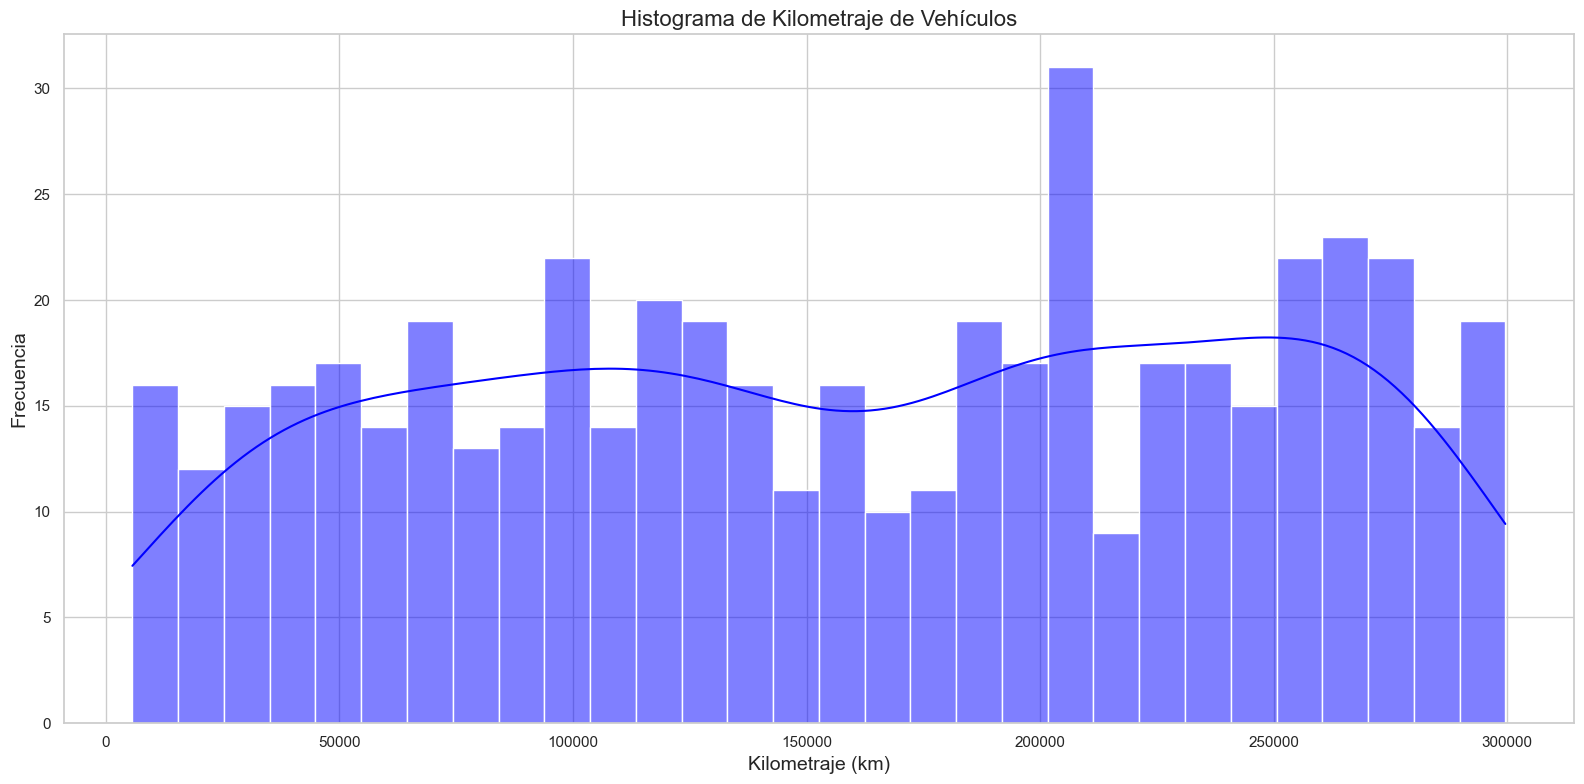

In [23]:
# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(16, 8))  # Ajustar el tamaño de la figura
sns.histplot(df['Kilometraje'], bins=30, kde=True, color='blue')

# Agregar título y etiquetas
plt.title('Histograma de Kilometraje de Vehículos', fontsize=16)
plt.xlabel('Kilometraje (km)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\566819272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marca', y='Kilometraje', palette='viridis')


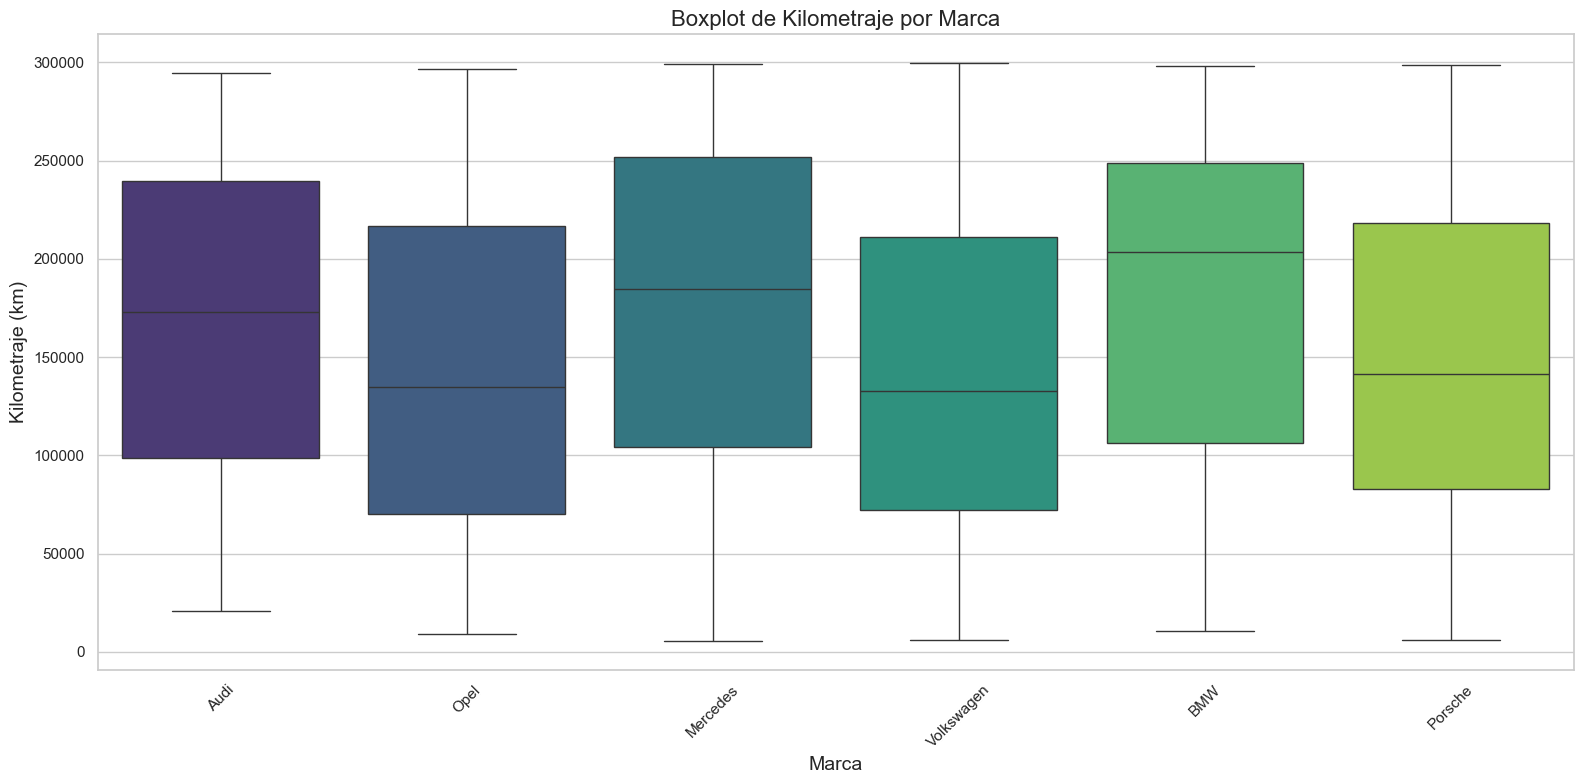

In [24]:
# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(16, 8))  # Ajustar el tamaño de la figura
sns.boxplot(data=df, x='Marca', y='Kilometraje', palette='viridis')

# Agregar título y etiquetas
plt.title('Boxplot de Kilometraje por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Kilometraje (km)', fontsize=14)

# Rotar las etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Análisis de Correlación entre Precio de Venta y Kilometraje

In [25]:
from scipy.stats import pearsonr

# Calcular el coeficiente de correlación de Pearson entre Precio de Venta y Kilometraje
correlacion, p_valor = pearsonr(df['Precio_Venta'], df['Kilometraje'])

# Mostrar el resultado
print(f"Coeficiente de correlación de Pearson: {correlacion:.2f}")
print(f"Valor p: {p_valor:.4f}")

Coeficiente de correlación de Pearson: -0.03
Valor p: 0.4966


El análisis de la correlación de Pearson entre el **Precio de Venta** y el **Kilometraje** nos ha dado los siguientes resultados:

- **Coeficiente de correlación de Pearson**: -0.03
- **Valor p**: 0.4966

#### Interpretación

1. **Coeficiente de correlación (-0.03)**:
   - Un coeficiente de -0.03 indica una relación **prácticamente nula y negativa** entre el precio de venta y el kilometraje. Esto significa que, en este conjunto de datos, **no hay una relación lineal significativa** entre ambas variables. Es decir, el kilometraje no parece tener un efecto directo en el precio de venta de los vehículos.

2. **Valor p (0.4966)**:
   - Un valor p de 0.4966 es **mayor que el umbral común de significancia de 0.05**, lo que sugiere que esta correlación no es estadísticamente significativa. En otras palabras, el coeficiente de correlación obtenido podría deberse al azar, y no proporciona evidencia de una relación lineal significativa entre el kilometraje y el precio de venta en este conjunto de datos.

#### Conclusión

Estos resultados sugieren que, en este caso, el **kilometraje no parece ser un factor relevante** en la determinación del precio de venta de los vehículos. Es posible que otros factores, como el modelo, el año o la marca, influyan más en el precio de venta que el kilometraje.

### Análisis de Precio Promedio de Venta por Grupo de Kilometraje

Al dividir los vehículos en tres grupos de kilometraje —Bajo, Medio y Alto— se obtuvieron los siguientes precios promedio de venta:

- **Grupo Bajo (0 - 100,000 km):** Precio Promedio: **53,009.73**
- **Grupo Medio (100,000 - 200,000 km):** Precio Promedio: **49,893.32**
- **Grupo Alto (más de 200,000 km):** Precio Promedio: **50,530.89**

In [26]:
# Crear categorías de kilometraje: Bajo, Medio y Alto
df['Grupo_Kilometraje'] = pd.cut(
    df['Kilometraje'],
    bins=[0, 100000, 200000, df['Kilometraje'].max()],
    labels=['Bajo', 'Medio', 'Alto']
)

# Calcular el precio promedio para cada grupo de kilometraje
precio_promedio_por_grupo = df.groupby('Grupo_Kilometraje')['Precio_Venta'].mean().reset_index()

# Mostrar los resultados
print(precio_promedio_por_grupo)

  Grupo_Kilometraje  Precio_Venta
0              Bajo  53009.728188
1             Medio  49893.323602
2              Alto  50530.894053


C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\2783740995.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_promedio_por_grupo = df.groupby('Grupo_Kilometraje')['Precio_Venta'].mean().reset_index()


### Interpretación del Análisis

Los resultados muestran que:

1. **Grupo Bajo**: Los vehículos en esta categoría, con menos kilometraje, tienen el precio promedio más alto. Esto sugiere que los autos con poco kilometraje mantienen un valor superior en el mercado.
   
2. **Grupo Medio**: En comparación con el grupo bajo, el precio promedio es más bajo, lo que puede reflejar la depreciación a medida que el kilometraje aumenta.
   
3. **Grupo Alto**: Curiosamente, el precio promedio de los vehículos de este grupo es ligeramente superior al del grupo medio, aunque sigue siendo menor que el de vehículos de bajo kilometraje. Esto podría ser indicativo de otros factores que afectan el precio, como el tipo de vehículo o el mantenimiento, en vez de solo el kilometraje.

Este análisis sugiere que el kilometraje tiene una relación compleja con el precio de venta, en la que intervienen factores adicionales que podrían ser investigados más a fondo para entender cómo impactan el valor de los vehículos en cada grupo de kilometraje.

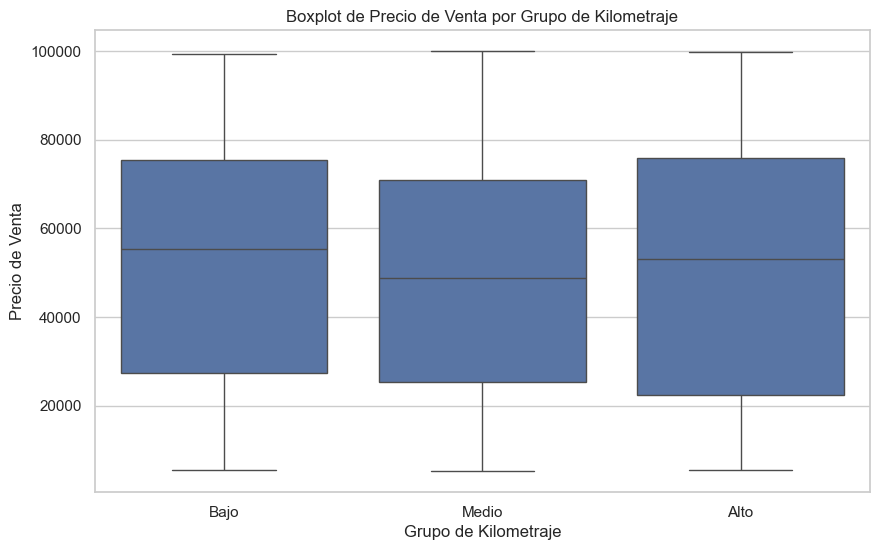

In [27]:
# Crear categorías de kilometraje (por ejemplo, bajo, medio, alto)
df['Grupo_Kilometraje'] = pd.cut(
    df['Kilometraje'],
    bins=[0, 100000, 200000, df['Kilometraje'].max()],
    labels=['Bajo', 'Medio', 'Alto']
)

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Grupo_Kilometraje', y='Precio_Venta')
plt.title('Boxplot de Precio de Venta por Grupo de Kilometraje')
plt.xlabel('Grupo de Kilometraje')
plt.ylabel('Precio de Venta')
plt.show()

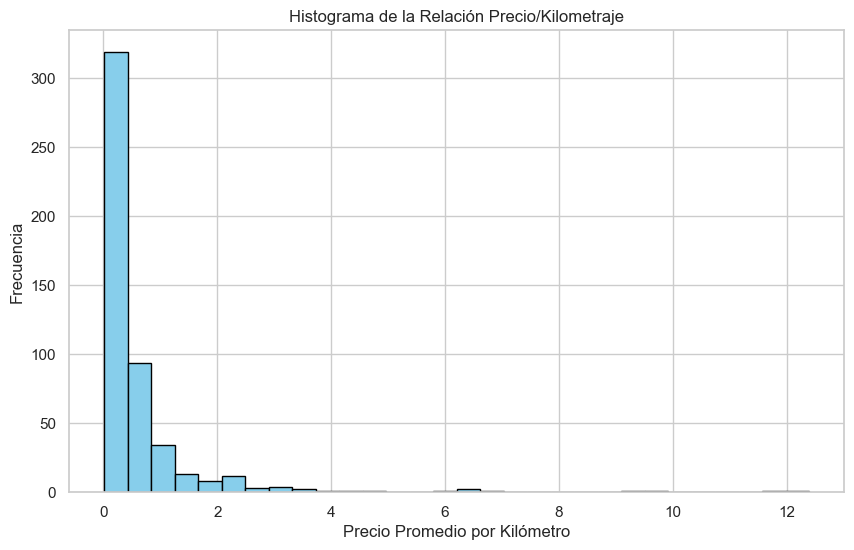

Vehículos con relación Precio/Kilometraje significativamente alta (percentil 95):


,Marca,Modelo,Año,Precio_Venta,Kilometraje,Precio_por_Kilometro
19,Porsche,Panamera,2012,94527.10,25451,3.714082
29,Volkswagen,Polo,2012,57566.52,9076,6.342719
78,Opel,Corsa,2008,44714.87,9099,4.914262
89,Porsche,Cayenne,2017,93202.48,15184,6.138203
125,BMW,3 Series,2012,72681.17,10437,6.963799
145,Porsche,Macan,2021,18776.95,6221,3.018317
157,Mercedes,E-Class,2007,93482.13,14163,6.600447
186,Volkswagen,Tiguan,2007,40194.66,17457,2.302495
192,Volkswagen,Tiguan,2017,92875.45,39037,2.379165
202,Volkswagen,Tiguan,2010,72101.87,22105,3.261790


In [28]:
# Calcular la relación Precio/Kilometraje
df['Precio_por_Kilometro'] = df['Precio_Venta'] / df['Kilometraje']

# Crear el histograma de Precio por Kilómetro
plt.figure(figsize=(10, 6))
plt.hist(df['Precio_por_Kilometro'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de la Relación Precio/Kilometraje')
plt.xlabel('Precio Promedio por Kilómetro')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de valores atípicos
# Determinamos un umbral para detectar valores atípicos (por ejemplo, mayores al percentil 95)
umbral_superior = df['Precio_por_Kilometro'].quantile(0.95)
valores_atipicos = df[df['Precio_por_Kilometro'] > umbral_superior]

# Mostrar los valores atípicos
print("Vehículos con relación Precio/Kilometraje significativamente alta (percentil 95):")
valores_atipicos[['Marca', 'Modelo', 'Año', 'Precio_Venta', 'Kilometraje', 'Precio_por_Kilometro']]

# Eje X (Precio Promedio por Kilómetro): Este eje muestra el precio promedio que se paga por cada kilómetro recorrido por los vehículos. 
# Los valores representan cuántos Euros cuesta mantener un vehículo por cada kilómetro que ha recorrido.

# Eje Y (Frecuencia): Este eje indica cuántos vehículos tienen una determinada relación de precio por kilómetro. 
# La frecuencia se refiere al número de vehículos que caen dentro de cada rango de precios por kilómetro.

### Análisis de Vehículos con una Relación Precio/Kilometraje Elevada

Esta tabla presenta vehículos cuyos costos por kilómetro (`Precio_por_Kilometro`) son notablemente altos en comparación con el resto de los datos. Estos resultados pueden indicar vehículos que, pese a su kilometraje, tienen precios altos, posiblemente por factores como marca, modelo, año de fabricación, o condición de mercado. A continuación, se desglosan algunos puntos clave:

1. **Alta Relación Precio/Kilometraje en Modelos Premium y Nuevos**:
   - **Mercedes E-Class** (2008 y 2012) y **Volkswagen Golf** (2016) muestran valores particularmente altos de `Precio_por_Kilometro` (por ejemplo, 12.39 y 9.63, respectivamente). Esto puede deberse a que los precios de estos modelos mantienen un valor elevado incluso a pesar del kilometraje relativamente alto, o a condiciones especiales del mercado que favorecen estas unidades.
   - Los vehículos de marcas de lujo como **Porsche**, **Mercedes**, y **BMW** presentan una relación precio/kilometraje más alta en muchos casos. Esto indica que el valor percibido de estas marcas permite que se vendan a precios altos incluso cuando tienen kilometraje más elevado.

2. **Modelos Económicos con Valores Altos**:
   - Vehículos como el **Volkswagen Polo** (2013) y el **Opel Corsa** (2008) también muestran valores altos de `Precio_por_Kilometro` (6.34 y 4.91, respectivamente). Para estos modelos, este valor puede reflejar un mantenimiento del precio debido a la percepción de confiabilidad o a la popularidad de estos modelos en el mercado.

3. **Valores Atípicos o Unidades Excepcionales**:
   - Algunos valores, como el **Mercedes E-Class** de 2008 (12.39) y el **Volkswagen Passat** de 2012 (11.62), destacan como valores atípicos en la relación precio/kilometraje. Estos valores indican unidades con un precio significativamente alto en comparación con su kilometraje. Esto podría ser resultado de un bajo kilometraje inusual para el modelo o de una sobrevaloración en el precio de venta.

### Conclusión

La relación precio/kilometraje permite observar patrones interesantes: 
- Los vehículos de lujo suelen conservar un alto valor por kilómetro, reflejando una percepción de calidad y durabilidad.
- Algunos vehículos económicos muestran precios elevados en relación con su kilometraje, posiblemente debido a su popularidad o percepción de confiabilidad.
  
En general, un valor alto de `Precio_por_Kilometro` puede estar vinculado a la marca y modelo del vehículo, sugiriendo que el kilometraje no siempre es el factor determinante en la valuación del automóvil.

### Conclusión sobre el Impacto del Kilometraje en el Precio de Venta de Vehículos

En base al análisis de la correlación y el precio promedio por grupo de kilometraje, podemos concluir que el **kilometraje no es un factor determinante del precio de venta de estos vehículos en este conjunto de datos**. A pesar de una ligera tendencia a que vehículos con menor kilometraje tengan precios más altos, la baja correlación (-0.03) y las pequeñas diferencias en los precios promedio por grupo sugieren que el kilometraje, por sí solo, **no explica significativamente las variaciones en el precio**.

Es posible que otros factores, como la **marca, el modelo, el tipo de combustible o el año de fabricación**, tengan un papel más influyente en el valor de venta. Este análisis también indica que los compradores y vendedores podrían estar considerando otros aspectos además del kilometraje al determinar el precio de un vehículo.

Para explorar más a fondo, podríamos realizar un análisis de regresión múltiple, evaluando el impacto combinado de varias variables, o utilizar técnicas de machine learning para determinar qué factores son realmente relevantes para predecir el precio en este contexto.

# Consumo de Combustible

## Análisis del Tipo de Combustible en los Vehículos

En este apartado, nos enfocaremos en analizar el **tipo de combustible** utilizado en los vehículos presentes en nuestro conjunto de datos. A medida que exploramos las variables disponibles, observamos que el dataset incluye información relevante sobre la **marca**, **modelo**, **año**, **kilometraje**, **consumo de combustible** por cada 100 kilómetros, **potencia**, **transmisión**, y **precio de venta**, entre otras. Esta diversidad de variables nos permitirá evaluar cómo el tipo de combustible puede influir en factores como el precio de venta, la eficiencia del consumo y las características de rendimiento de los vehículos. A través de este análisis, buscaremos identificar patrones y tendencias que nos ayuden a comprender mejor el impacto del tipo de combustible en el mercado automotriz.

In [29]:
# Obtener los valores únicos de la columna 'Tipo_Combustible'
valores_unicos_combustible = df['Tipo_Combustible'].unique()
valores_unicos_combustible

array(['Diesel', 'Hybrid', 'Electric', 'Petrol'], dtype=object)

## Calcular el consumo promedio de combustible por marca y tipo de combustible

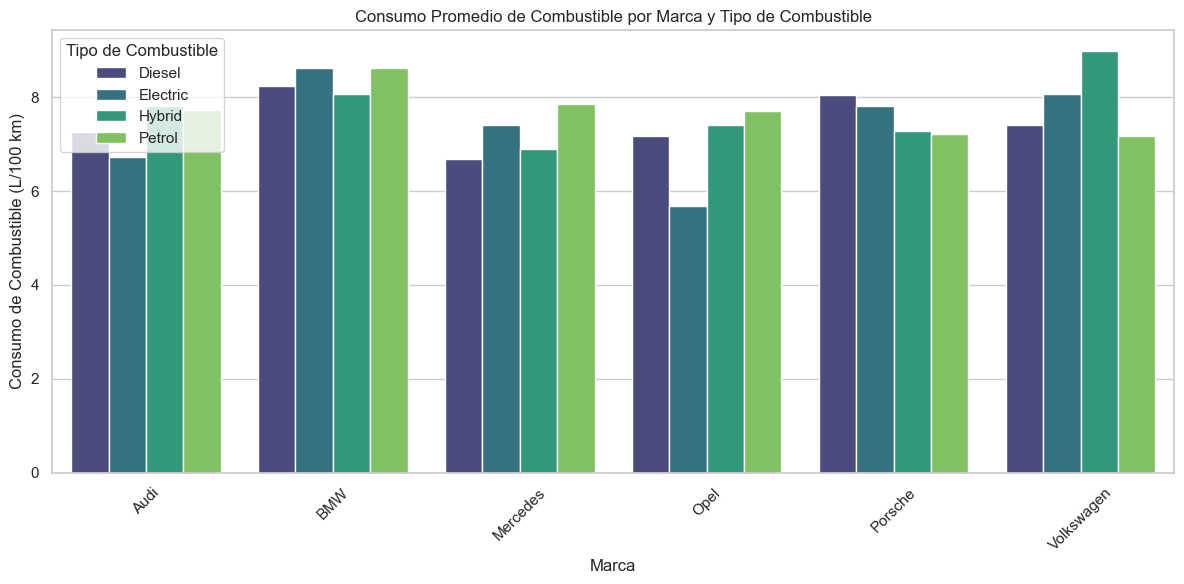

In [30]:
consumo_promedio = df.groupby(['Marca', 'Tipo_Combustible'])['Consumo_Combustible_L_100km'].mean().reset_index()

# Crear el gráfico de consumo promedio por marca y tipo de combustible
plt.figure(figsize=(12, 6))
sns.barplot(data=consumo_promedio, x='Marca', y='Consumo_Combustible_L_100km', hue='Tipo_Combustible', palette='viridis')
plt.title('Consumo Promedio de Combustible por Marca y Tipo de Combustible')
plt.xlabel('Marca')
plt.ylabel('Consumo de Combustible (L/100 km)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustible')
plt.tight_layout()
plt.show()

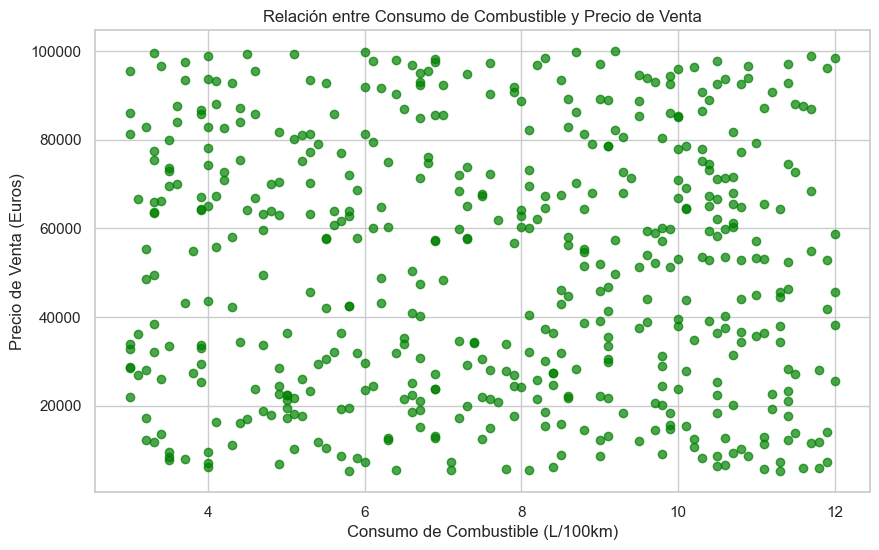

In [31]:
# Crear un gráfico de dispersión (scatter plot) para visualizar la relación entre consumo de combustible y precio de venta
plt.figure(figsize=(10, 6))
plt.scatter(df['Consumo_Combustible_L_100km'], df['Precio_Venta'], alpha=0.7, color='green')
plt.title('Relación entre Consumo de Combustible y Precio de Venta')
plt.xlabel('Consumo de Combustible (L/100km)')
plt.ylabel('Precio de Venta (Euros)')
plt.grid(True)
plt.show()

## Análisis de la Potencia de los Vehículos por Marca: 

Este boxplot muestra la distribución de la potencia (en caballos de fuerza) de los vehículos agrupados por marca. Al analizar la potencia promedio de cada marca, podemos identificar diferencias significativas en el rendimiento de los vehículos y observar la variabilidad dentro de cada marca. Esto puede proporcionar información valiosa para los consumidores que buscan vehículos con un rendimiento específico.

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\233913750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marca', y='Potencia_HP', palette='Set2')


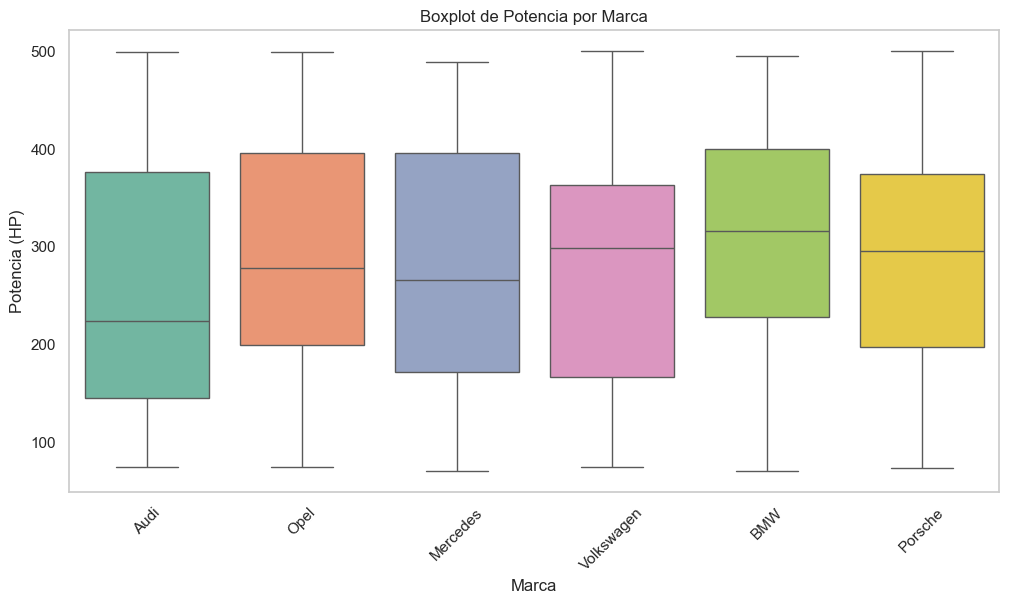

In [32]:
# Crear un boxplot de potencia por marca
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Marca', y='Potencia_HP', palette='Set2')
plt.title('Boxplot de Potencia por Marca')
plt.xlabel('Marca')
plt.ylabel('Potencia (HP)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

## Análisis de la Relación entre Potencia y Precio: 

Este scatter plot ilustra cómo la potencia de un vehículo (en caballos de fuerza) se relaciona con su precio de venta. Al incluir diferentes colores para cada tipo de combustible, se busca resaltar cómo las distintas tecnologías de motorización pueden influir en el precio del vehículo. Este análisis puede ayudar a los compradores a entender si hay una correlación significativa entre la potencia de un vehículo y su costo, lo cual es esencial para tomar decisiones informadas al momento de adquirir un auto.

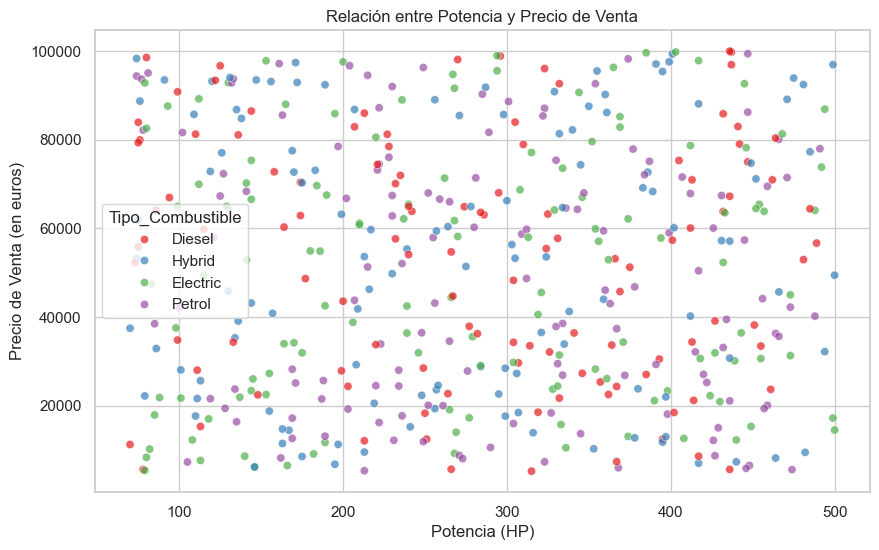

In [33]:
# Crear un scatter plot de Potencia vs Precio de Venta
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Potencia_HP', y='Precio_Venta', hue='Tipo_Combustible', palette='Set1', alpha=0.7)
plt.title('Relación entre Potencia y Precio de Venta')
plt.xlabel('Potencia (HP)')
plt.ylabel('Precio de Venta (en euros)')
plt.grid(True)

# Mostrar la gráfica
plt.show()

## Boxplot de Precio por Intervalos de Potencia:

Se puede crear un boxplot que divida los vehículos en categorías de potencia (por ejemplo, bajo, medio, alto) y muestre la distribución del precio dentro de cada categoría. Esto proporciona una visualización clara de cómo varía el precio según la potencia.

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\2578138553.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Grupo_Potencia', y='Precio_Venta', palette='Set2')


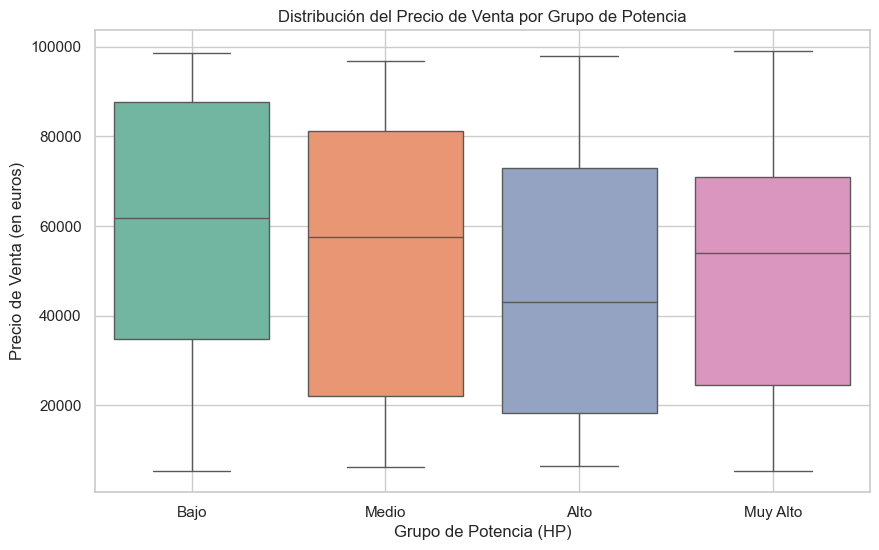

In [34]:
# Categorizar la potencia en grupos
bins = [0, 100, 150, 200, 300]
labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto']
df['Grupo_Potencia'] = pd.cut(df['Potencia_HP'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Grupo_Potencia', y='Precio_Venta', palette='Set2')
plt.title('Distribución del Precio de Venta por Grupo de Potencia')
plt.xlabel('Grupo de Potencia (HP)')
plt.ylabel('Precio de Venta (en euros)')
plt.grid(True)
plt.show()

## Gráfico de Barras de Precio Promedio por Potencia

Se puede calcular el precio promedio por grupos de potencia y luego crear un gráfico de barras. Esto permite comparar fácilmente los precios promedios de diferentes categorías de potencia.

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\2229933950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_promedio_potencia = df.groupby('Grupo_Potencia')['Precio_Venta'].mean().reset_index()
C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\2229933950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_promedio_potencia, x='Grupo_Potencia', y='Precio_Venta', palette='Set3')


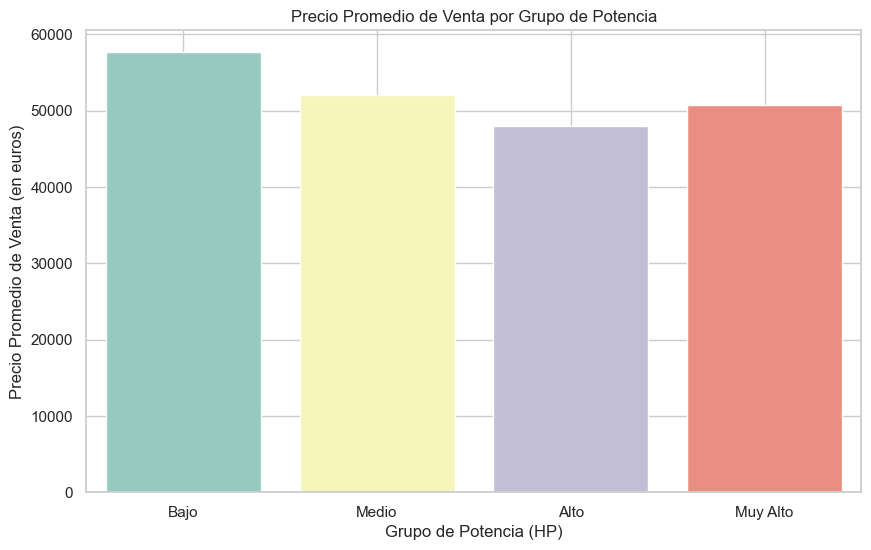

In [35]:
precio_promedio_potencia = df.groupby('Grupo_Potencia')['Precio_Venta'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=precio_promedio_potencia, x='Grupo_Potencia', y='Precio_Venta', palette='Set3')
plt.title('Precio Promedio de Venta por Grupo de Potencia')
plt.xlabel('Grupo de Potencia (HP)')
plt.ylabel('Precio Promedio de Venta (en euros)')
plt.grid(True)
plt.show()

## Análisis Geográfico: Distribución de Ventas por Ciudad

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\3122061248.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_ciudad, x='Ciudad', y='Cantidad_Vehiculos', palette='viridis')


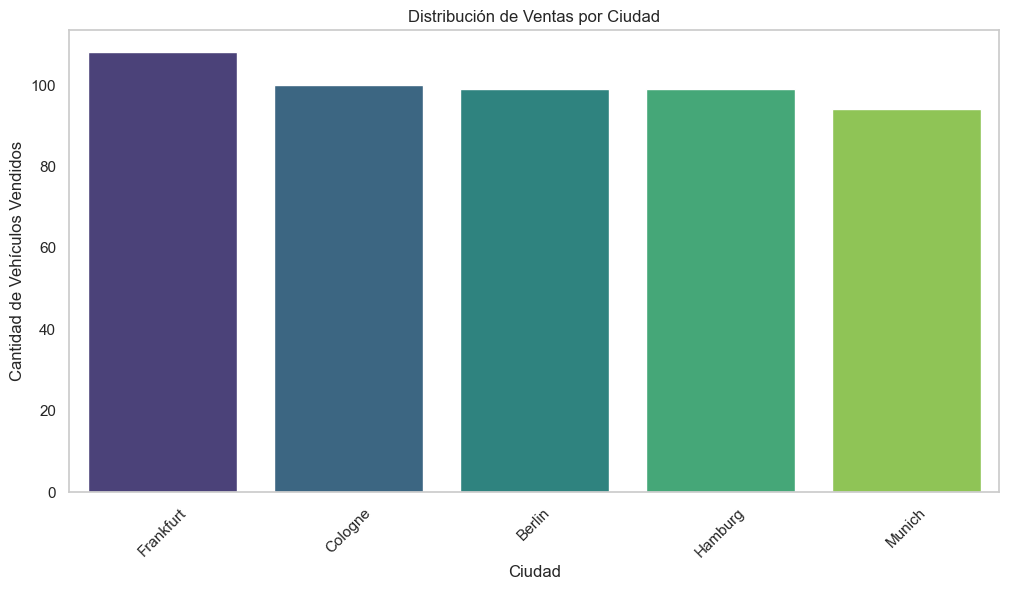

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de vehículos vendidos por ciudad
ventas_por_ciudad = df['Ciudad'].value_counts().reset_index()
ventas_por_ciudad.columns = ['Ciudad', 'Cantidad_Vehiculos']

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_ciudad, x='Ciudad', y='Cantidad_Vehiculos', palette='viridis')
plt.title('Distribución de Ventas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Vehículos Vendidos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y')
plt.show()

## Análisis del Promedio de Precios por Marca y Ciudad

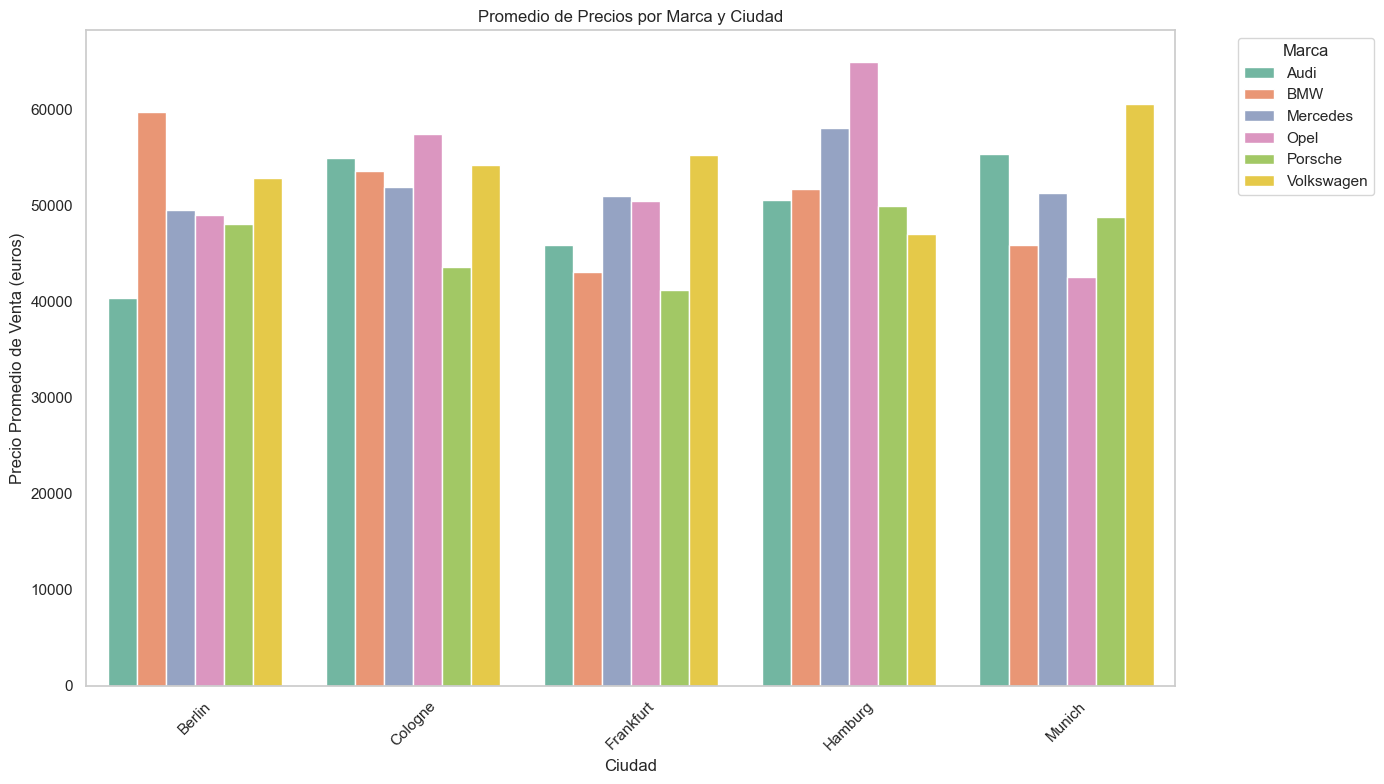

In [37]:
# Calcular el promedio de precios por marca y ciudad
promedio_precios = df.groupby(['Marca', 'Ciudad'])['Precio_Venta'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=promedio_precios, x='Ciudad', y='Precio_Venta', hue='Marca', palette='Set2')
plt.title('Promedio de Precios por Marca y Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio de Venta (euros)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda fuera del gráfico
plt.grid(axis='y')
plt.tight_layout()  # Ajustar el diseño para que no se sobrepongan elementos
plt.show()

In [38]:
# Calcular el promedio de precios por marca y ciudad
promedio_precios = df.groupby(['Marca', 'Ciudad'])['Precio_Venta'].mean().reset_index()

# Ordenar la tabla por ciudad y luego por precio
promedio_precios = promedio_precios.sort_values(by=['Ciudad', 'Precio_Venta'])

# Mostrar la tabla
promedio_precios.head()

,Marca,Ciudad,Precio_Venta
0,Audi,Berlin,40405.157273
20,Porsche,Berlin,48027.475833
15,Opel,Berlin,48973.421875
10,Mercedes,Berlin,49558.962500
25,Volkswagen,Berlin,52826.092917


### Análisis de Precios de Venta por Marca y Ciudad

La tabla muestra el precio promedio de venta de varios modelos de vehículos en diferentes ciudades, incluyendo Audi, Porsche, Opel, Mercedes, BMW y Volkswagen. A continuación, se presenta un análisis de los resultados:

#### Resumen de Resultados

1. **Audi**:
   - **Ciudad más económica**: **Berlin** con un precio promedio de **40,405.16** euros.
   - **Ciudad más cara**: **Munich** con un precio promedio de **55,328.63** euros.
   
2. **Porsche**:
   - **Ciudad más económica**: **Frankfurt** con un precio promedio de **41,238.04** euros.
   - **Ciudad más cara**: **Berlin** con un precio promedio de **48,027.48** euros.

3. **Opel**:
   - **Ciudad más económica**: **Munich** con un precio promedio de **42,502.54** euros.
   - **Ciudad más cara**: **Hamburg** con un precio promedio de **64,948.72** euros.

4. **Mercedes**:
   - **Ciudad más económica**: **Cologne** con un precio promedio de **51,868.38** euros.
   - **Ciudad más cara**: **Hamburg** con un precio promedio de **58,074.81** euros.

5. **BMW**:
   - **Ciudad más económica**: **Frankfurt** con un precio promedio de **43,038.60** euros.
   - **Ciudad más cara**: **Berlin** con un precio promedio de **59,734.73** euros.

6. **Volkswagen**:
   - **Ciudad más económica**: **Hamburg** con un precio promedio de **47,010.58** euros.
   - **Ciudad más cara**: **Munich** con un precio promedio de **60,489.67** euros.

#### Conclusiones

- **Variabilidad de Precios**: Existe una notable variabilidad en los precios de venta de vehículos entre diferentes ciudades. Por ejemplo, Audi se puede adquirir a un precio promedio significativamente más bajo en Berlin en comparación con Munich, lo que sugiere que factores locales como la demanda y la competencia pueden influir en los precios.

- **Oportunidades de Ahorro**: Para los compradores que buscan ahorrar, las ciudades como Berlin y Frankfurt se presentan como las mejores opciones para varias marcas. Los consumidores que estén dispuestos a viajar o a buscar opciones en estas ciudades pueden beneficiarse de precios más competitivos.

- **Estrategias de Compra**: Los compradores potenciales deberían considerar investigar las ciudades donde los precios son más bajos para cada marca. Por ejemplo, un comprador interesado en un Audi podría optar por comprar en Berlin, mientras que aquellos interesados en un Opel deberían mirar en Munich. Esta información es valiosa para maximizar el valor de su inversión en un vehículo.

- **Factores de Decisión**: Además del precio, los compradores también deben considerar otros factores como la disponibilidad de modelos, el servicio postventa y la reputación del concesionario, que también pueden variar entre ciudades y afectar la decisión de compra.

En resumen, este análisis proporciona una visión clara sobre dónde se pueden obtener mejores ofertas en vehículos según la marca y la ciudad, ayudando a los consumidores a tomar decisiones de compra más informadas.

## Análisis de Clusters de Vehículos
En este caso, aplicaremos técnicas de clustering para identificar grupos de vehículos similares utilizando variables como el precio, la potencia, el consumo de combustible y el kilometraje. Esto nos ayudará a entender mejor cómo se relacionan estos vehículos entre sí y a identificar patrones que podrían ser útiles para análisis futuros o decisiones de compra.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [40]:
# Convertir columnas a numérico y manejar errores
df['Precio_Venta'] = pd.to_numeric(df['Precio_Venta'], errors='coerce')
df['Potencia_HP'] = pd.to_numeric(df['Potencia_HP'], errors='coerce')
df['Consumo_Combustible_L_100km'] = pd.to_numeric(df['Consumo_Combustible_L_100km'], errors='coerce')

# Verificar si hubo NaN después de la conversión
print("Valores NaN después de la conversión:")
print(df[['Precio_Venta', 'Potencia_HP', 'Consumo_Combustible_L_100km']].isna().sum())

Valores NaN después de la conversión:
Precio_Venta                   0
Potencia_HP                    0
Consumo_Combustible_L_100km    0
dtype: int64


In [41]:
# Eliminar filas con NaN
df = df.dropna(subset=['Precio_Venta', 'Potencia_HP', 'Consumo_Combustible_L_100km'])

In [42]:
# Seleccionamos las características para el clustering
features = df[['Precio_Venta', 'Potencia_HP', 'Consumo_Combustible_L_100km']]

# Estandarizamos los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, execu

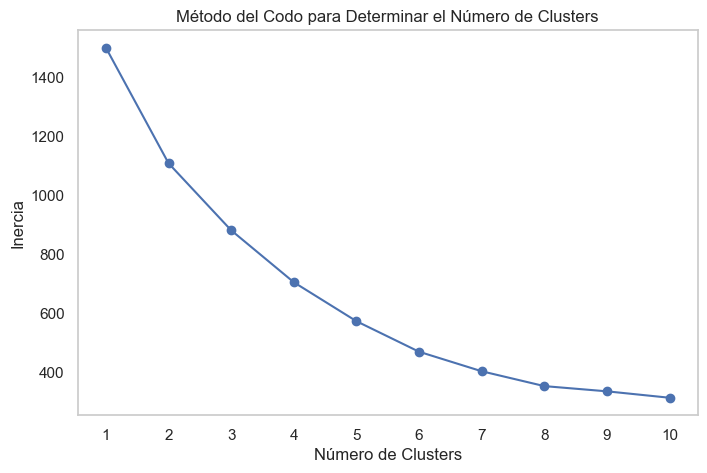

In [43]:
# Determinamos el número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [44]:
# Aplicamos KMeans con el número óptimo de clusters (determinado visualmente)
optimal_k = 5  # Cambia esto según tu análisis visual
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

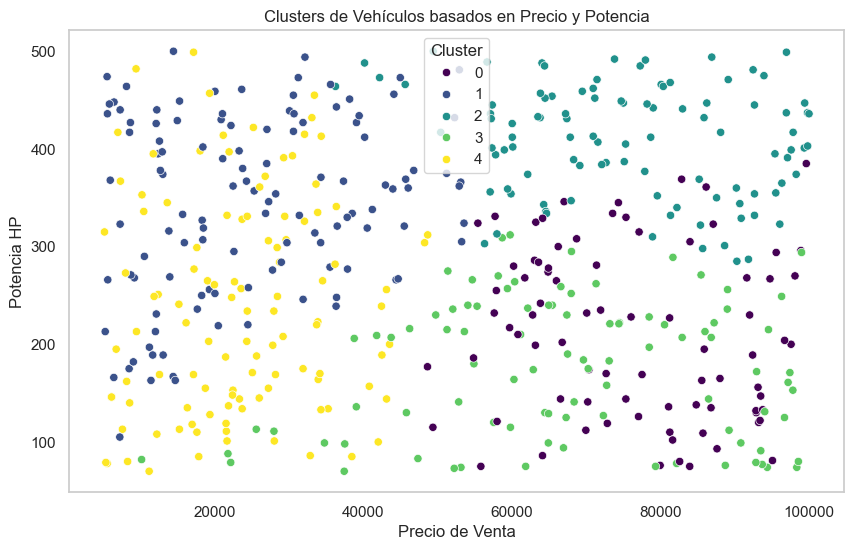

In [45]:
# Visualizamos los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Precio_Venta', y='Potencia_HP', hue='Cluster', palette='viridis')
plt.title('Clusters de Vehículos basados en Precio y Potencia')
plt.xlabel('Precio de Venta')
plt.ylabel('Potencia HP')
plt.legend(title='Cluster')
plt.grid()
plt.show()

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\1519003067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Precio_Venta', palette='viridis')


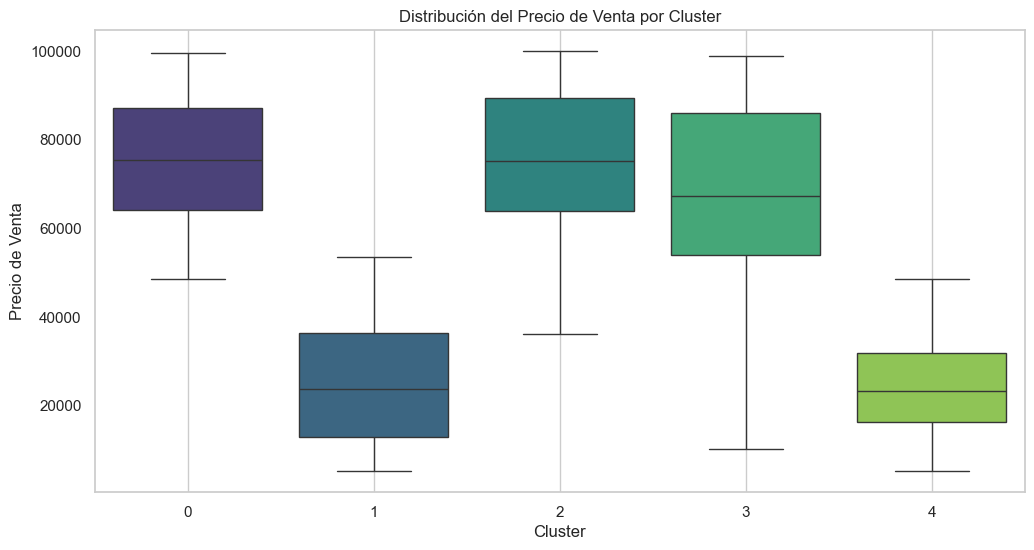

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\1519003067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Potencia_HP', palette='viridis')


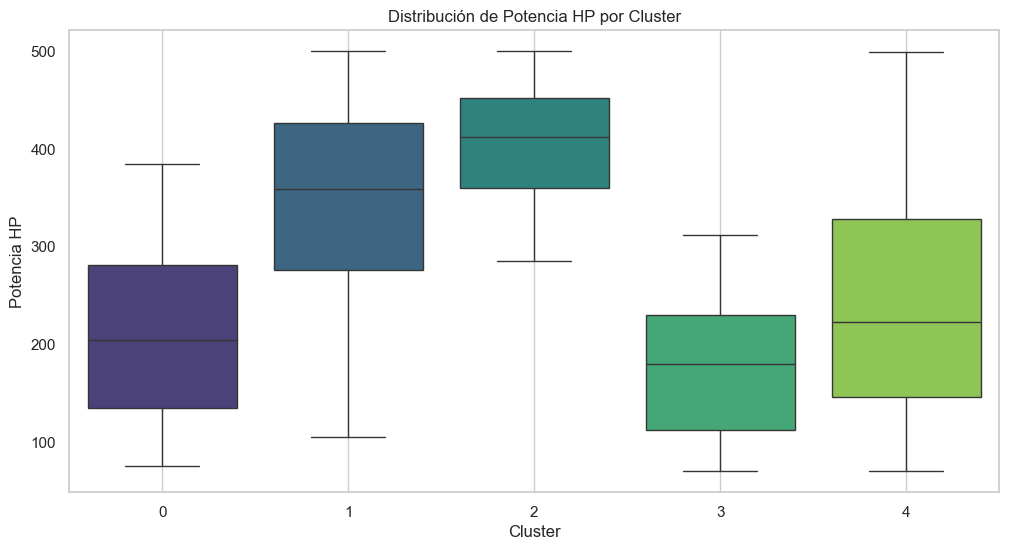

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13540\1519003067.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Consumo_Combustible_L_100km', palette='viridis')


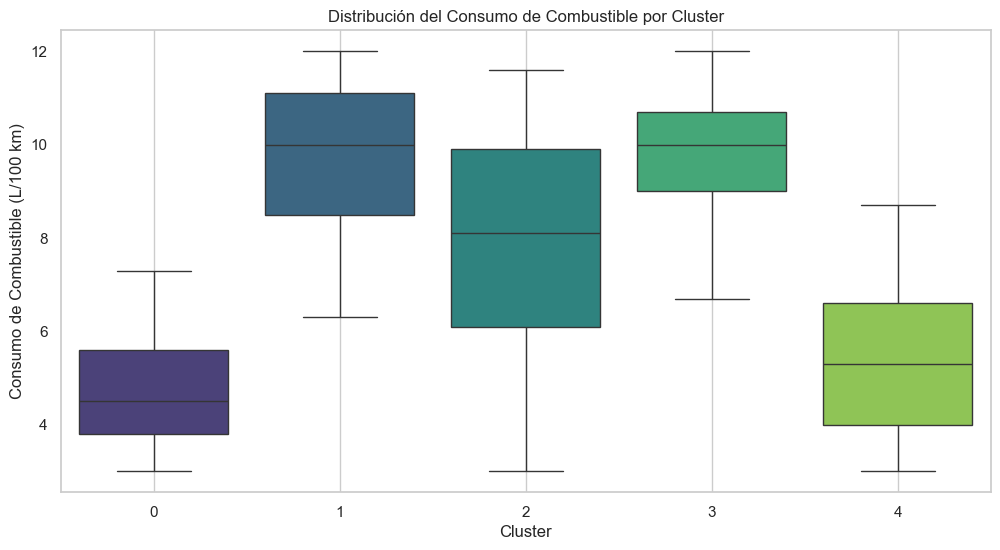

In [46]:
# Crear un gráfico de cajas para Precio de Venta
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cluster', y='Precio_Venta', palette='viridis')
plt.title('Distribución del Precio de Venta por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Precio de Venta')
plt.grid()
plt.show()

# Crear un gráfico de cajas para Potencia HP
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cluster', y='Potencia_HP', palette='viridis')
plt.title('Distribución de Potencia HP por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Potencia HP')
plt.grid()
plt.show()

# Crear un gráfico de cajas para Consumo de Combustible
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cluster', y='Consumo_Combustible_L_100km', palette='viridis')
plt.title('Distribución del Consumo de Combustible por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Consumo de Combustible (L/100 km)')
plt.grid()
plt.show()

In [47]:
# Calcular la media por Cluster
cluster_summary = df.groupby('Cluster').agg({
    'Precio_Venta': 'mean',
    'Potencia_HP': 'mean',
    'Consumo_Combustible_L_100km': 'mean'
}).reset_index()

# Mostrar el resultado
print("Resumen de Clusters:")
cluster_summary

Resumen de Clusters:


,Cluster,Precio_Venta,Potencia_HP,Consumo_Combustible_L_100km
0,0,76222.901605,211.481481,4.746914
1,1,25262.727094,344.170940,9.748718
2,2,75641.842200,408.260000,7.829000
3,3,67463.141613,174.935484,9.838710
4,4,23523.797982,239.110092,5.434862


In [48]:
# Verificar valores únicos en Cluster
print("Valores únicos en la columna Cluster:")
print(df['Cluster'].unique())

Valores únicos en la columna Cluster:
[1 4 2 0 3]


## Resumen de Clusters (con **2 clusters**)

El resultado del cálculo de la media por cluster al cambiar a 2 clusters muestra las características promedio de los vehículos agrupados en dos grupos distintos:

1. **Cluster 0:**
   - **Precio Venta Promedio:** 76,110.77
   - **Potencia Promedio:** 275.04 HP
   - **Consumo de Combustible Promedio:** 7.50 L/100km

2. **Cluster 1:**
   - **Precio Venta Promedio:** 25,613.83
   - **Potencia Promedio:** 287.29 HP
   - **Consumo de Combustible Promedio:** 7.76 L/100km

### Conclusión
Al agrupar los vehículos en solo dos clusters, se observa que:
- El **Cluster 0** contiene vehículos con un precio significativamente más alto y una potencia ligeramente menor, mientras que el **Cluster 1** incluye vehículos más económicos con un precio notablemente inferior y una potencia similar.
- Ambos clusters presentan consumos de combustible similares, lo que sugiere que el costo del vehículo no necesariamente se traduce en una eficiencia de combustible diferente. Estos insights pueden ser útiles para identificar segmentos de mercado y definir estrategias de ventas o marketing.

## Resumen de Clusters (con **5 clusters**):

| Cluster | Precio_Venta  | Potencia_HP  | Consumo_Combustible_L_100km |
|---------|----------------|--------------|-------------------------------|
| 0       | 76,222.90      | 211.48       | 4.75                          |
| 1       | 25,262.73      | 344.17       | 9.75                          |
| 2       | 75,641.84      | 408.26       | 7.83                          |
| 3       | 67,463.14      | 174.94       | 9.84                          |
| 4       | 23,523.80      | 239.11       | 5.43                          |

### Análisis de los Resultados

1. **Cluster 0:**
   - **Precio de Venta Promedio:** 76,222.90
   - **Potencia HP Promedio:** 211.48
   - **Consumo de Combustible Promedio:** 4.75 L/100 km
   - Este grupo tiene un precio de venta relativamente alto, con una potencia media moderada y un consumo de combustible bajo, sugiriendo que son vehículos más eficientes y quizás de un segmento más premium.

2. **Cluster 1:**
   - **Precio de Venta Promedio:** 25,262.73
   - **Potencia HP Promedio:** 344.17
   - **Consumo de Combustible Promedio:** 9.75 L/100 km
   - Este cluster muestra un precio de venta bajo, pero con una alta potencia promedio. Esto podría indicar que estos vehículos son más deportivos o de alto rendimiento, aunque a expensas de un mayor consumo de combustible.

3. **Cluster 2:**
   - **Precio de Venta Promedio:** 75,641.84
   - **Potencia HP Promedio:** 408.26
   - **Consumo de Combustible Promedio:** 7.83 L/100 km
   - Similar al cluster 0, este grupo también tiene un precio elevado y alta potencia, pero un consumo de combustible un poco mayor. Esto sugiere que estos vehículos son también de alta gama pero quizás con un enfoque diferente en la eficiencia.

4. **Cluster 3:**
   - **Precio de Venta Promedio:** 67,463.14
   - **Potencia HP Promedio:** 174.94
   - **Consumo de Combustible Promedio:** 9.84 L/100 km
   - Este grupo tiene un precio intermedio y una potencia baja, junto con un alto consumo de combustible. Esto puede indicar vehículos más antiguos o menos eficientes en términos de rendimiento.

5. **Cluster 4:**
   - **Precio de Venta Promedio:** 23,523.80
   - **Potencia HP Promedio:** 239.11
   - **Consumo de Combustible Promedio:** 5.43 L/100 km
   - Este cluster tiene el precio más bajo y un consumo de combustible relativamente bajo. Esto sugiere que estos vehículos son económicos y accesibles, orientados a un mercado más general.

### Conclusión

Al segmentar en 5 clusters, se pueden observar diferentes grupos de vehículos basados en el precio de venta, potencia y consumo de combustible. Esto proporciona información valiosa sobre las características y el posicionamiento de diferentes vehículos en el mercado, permitiendo a los analistas y a los responsables de marketing enfocar sus estrategias en función de los segmentos identificados.